# Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [1]:
#Import all necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
# For randomized data splitting
from sklearn.model_selection import train_test_split,GridSearchCV
# to build logisticregression
from sklearn.linear_model import LogisticRegression
# To check model performance
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
#to build LD model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#  Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

#  Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

## Importing data

In [2]:
el_df = pd.read_excel('Election_Data.xlsx' ,sheet_name='Election_Dataset_Two Classes')

## EDA

In [3]:
el_df.keys()

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [4]:
el_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


## Shape

In [5]:
el_df.shape

(1525, 10)

## Data type of data features

In [6]:
el_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [7]:
el_df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

## checking null values

In [8]:
el_df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

## checking duplicated values

In [9]:
el_df.duplicated().sum()

0

## separating categotrical columns and numerical columns

## dropping unnamed variable 

In [10]:
el_df.drop(('Unnamed: 0'),axis = 1,inplace=True)

In [11]:
el_df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [12]:
cat = ['vote','gender','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge',]
num =[x for x in el_df.columns if x not in cat]
print(cat)
print(num)

['vote', 'gender', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']
['age']


In [13]:
el_df['age'].value_counts()

37    42
49    39
35    39
47    38
54    37
      ..
87     3
92     2
90     1
93     1
91     1
Name: age, Length: 70, dtype: int64

## Summary Statistics

In [14]:
el_df.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.0,16.0,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.0,1.0,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.0,1.0,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.0,1.0,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,3.0,1.0,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,7.0,3.0,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,2.0,1.0,0.0,0.0,2.0,2.0,3.0


In [15]:
el_df[num].describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.0,16.0,24.0,41.0,53.0,67.0,93.0


## Univariate Analysis for categorical variable

In [16]:
for catvar in cat:
    print(catvar,'  No of Levels:',el_df[catvar].nunique())
    print(el_df[catvar].value_counts())
    print('\n\n')

vote   No of Levels: 2
Labour          1063
Conservative     462
Name: vote, dtype: int64



gender   No of Levels: 2
female    812
male      713
Name: gender, dtype: int64



economic.cond.national   No of Levels: 5
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64



economic.cond.household   No of Levels: 5
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64



Blair   No of Levels: 5
4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64



Hague   No of Levels: 5
2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64



Europe   No of Levels: 11
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64



political.knowledge   No of Levels: 4
2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64





## checking target variable proportion 

In [17]:
el_df['vote'].value_counts(1)*100

Labour          69.704918
Conservative    30.295082
Name: vote, dtype: float64

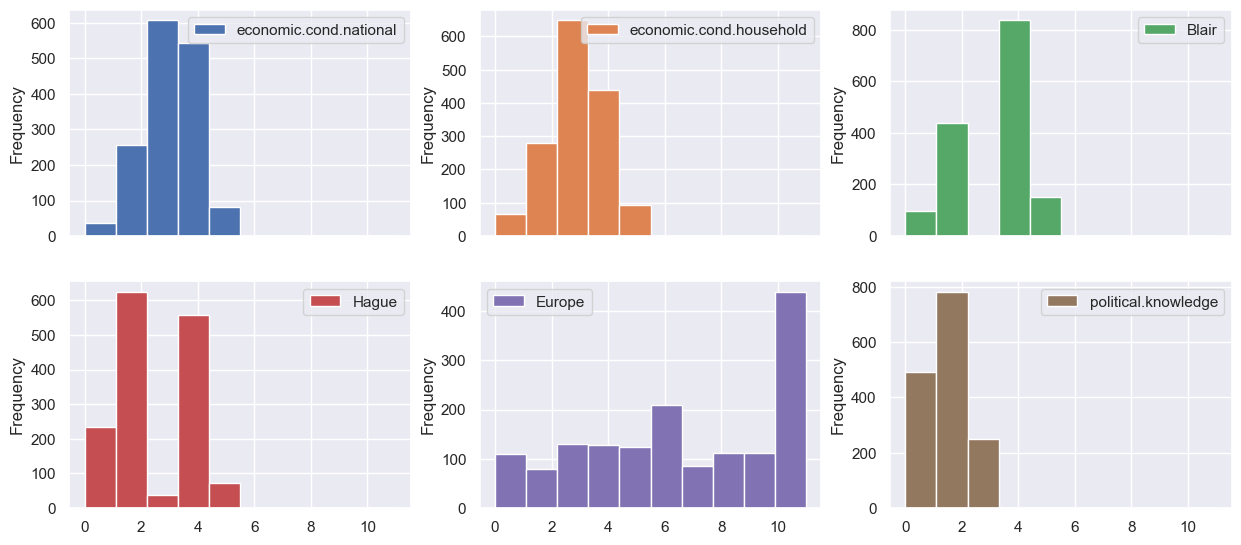

In [18]:
el_df[cat].plot(kind='hist',subplots=True, layout=(3,3), figsize=(15,10));

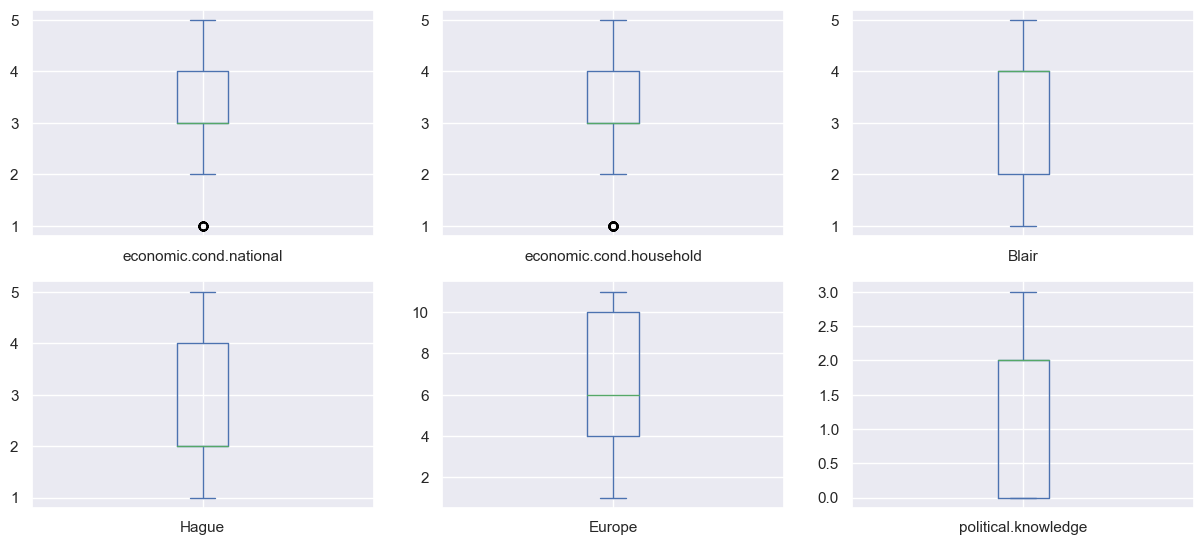

In [19]:
el_df[cat].plot(kind='box', subplots=True, layout=(3,3), figsize=(15,10));

# Univariate Analysis for numeric variable

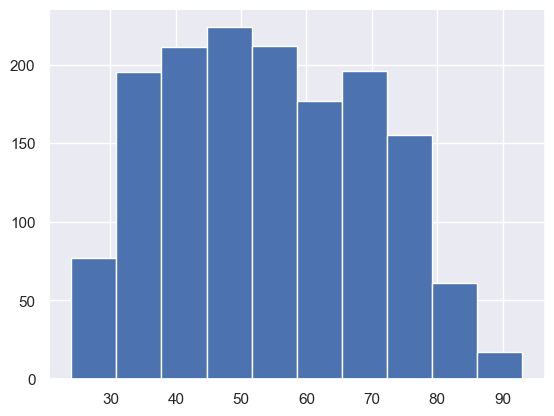

In [20]:
plt.hist(el_df['age']);

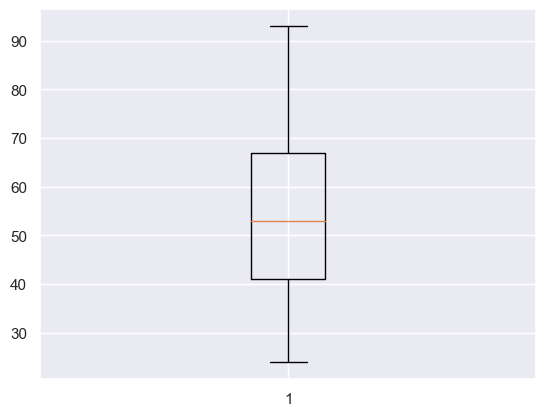

In [21]:
plt.boxplot(el_df['age']);

In [22]:
el_df['age'].skew()

0.14462077228942483

## Bivariate and Multivariate Analysis

## Target Variable vs Numeric Independent Variables

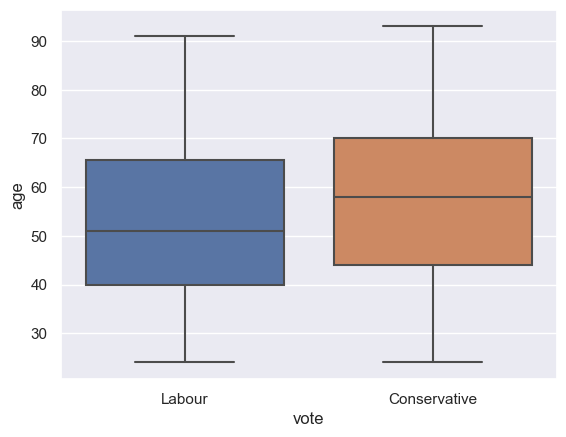

In [23]:
for cols in num:
    sns.boxplot(data=el_df,x='vote',y=cols)
    plt.show();

## Target Variable vs Categorical Independent Variables

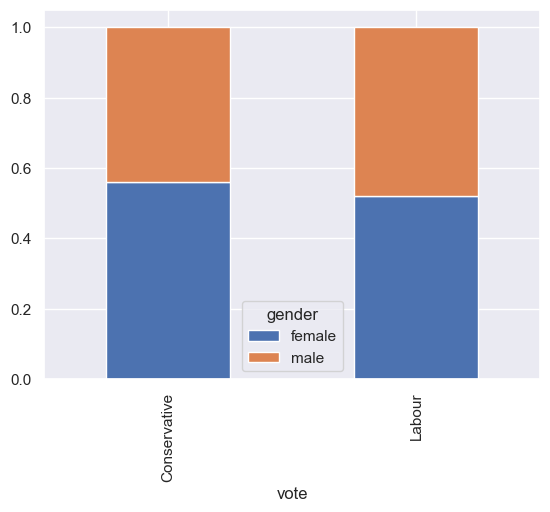

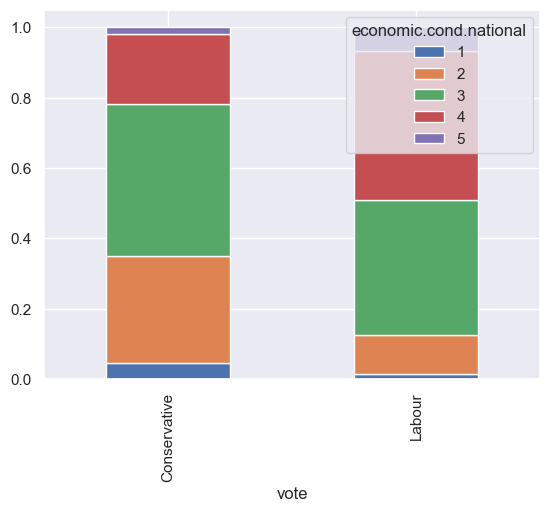

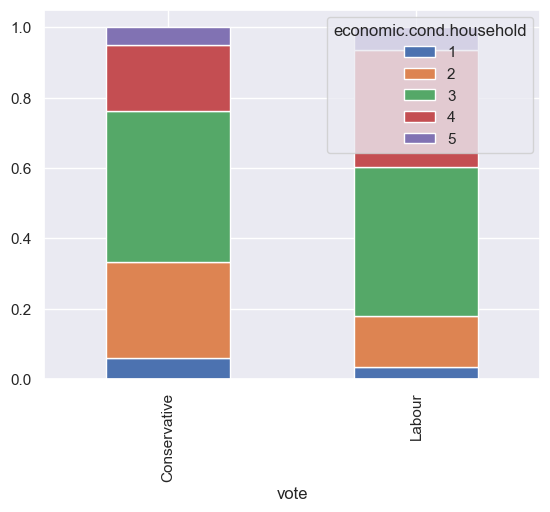

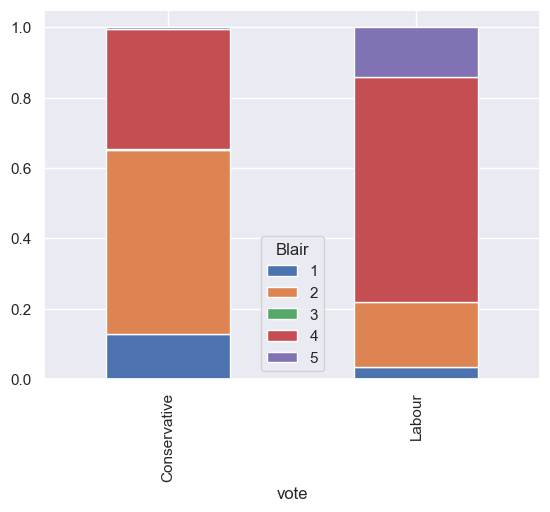

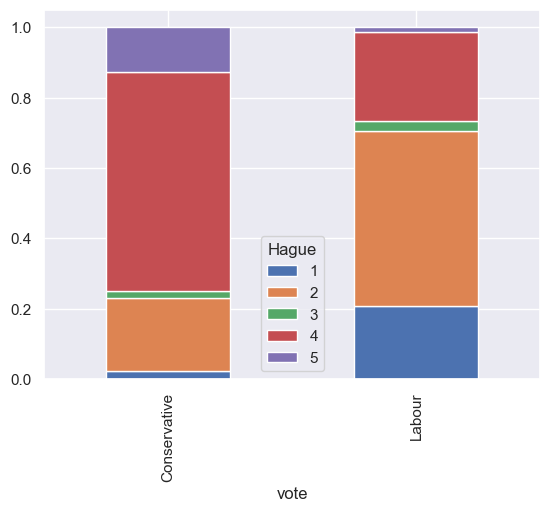

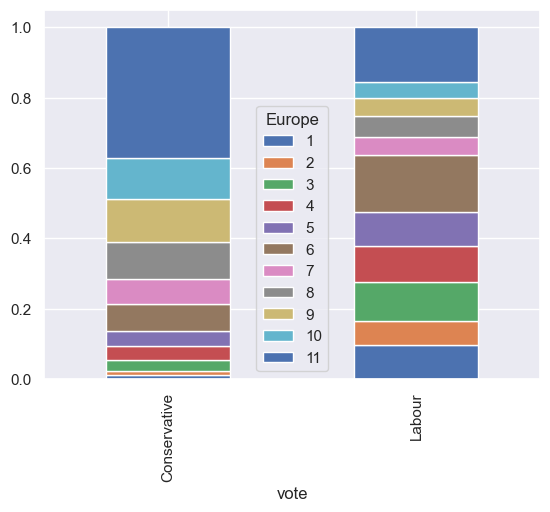

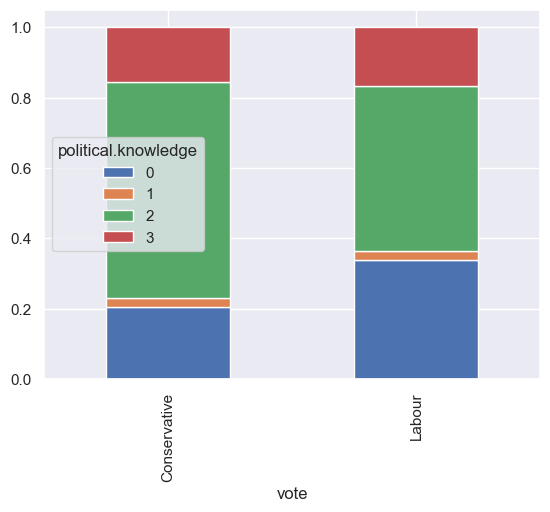

In [24]:
for cols in cat:
    if cols != 'vote':
        tab = pd.crosstab(el_df['vote'],el_df[cols],normalize='index')
        tab.plot(kind='bar',stacked = True)
        plt.show();

# Correlation Plot

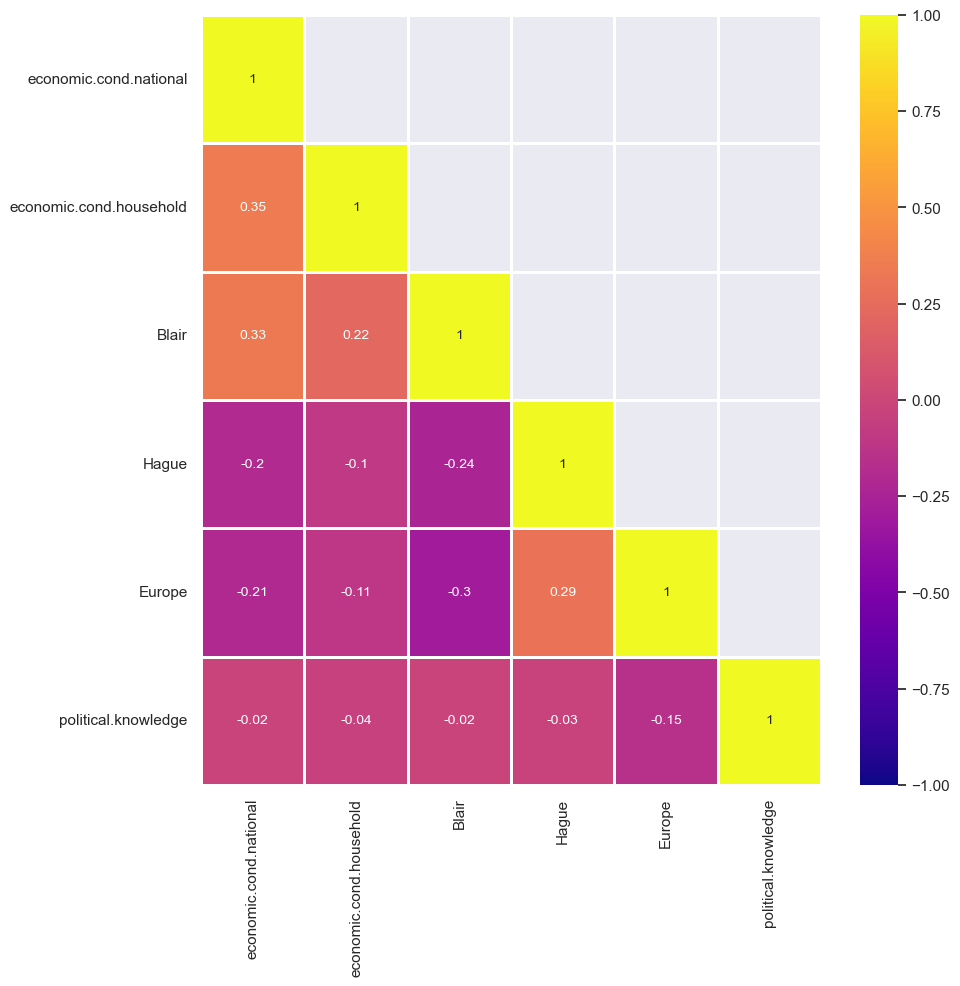

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(el_df[cat].corr().round(2),
            annot=True, 
            mask = np.triu(el_df[cat].corr(),1),
            cmap='plasma',
            vmin =-1, 
            vmax=1, 
            linewidths=2, 
            annot_kws={'size':10});

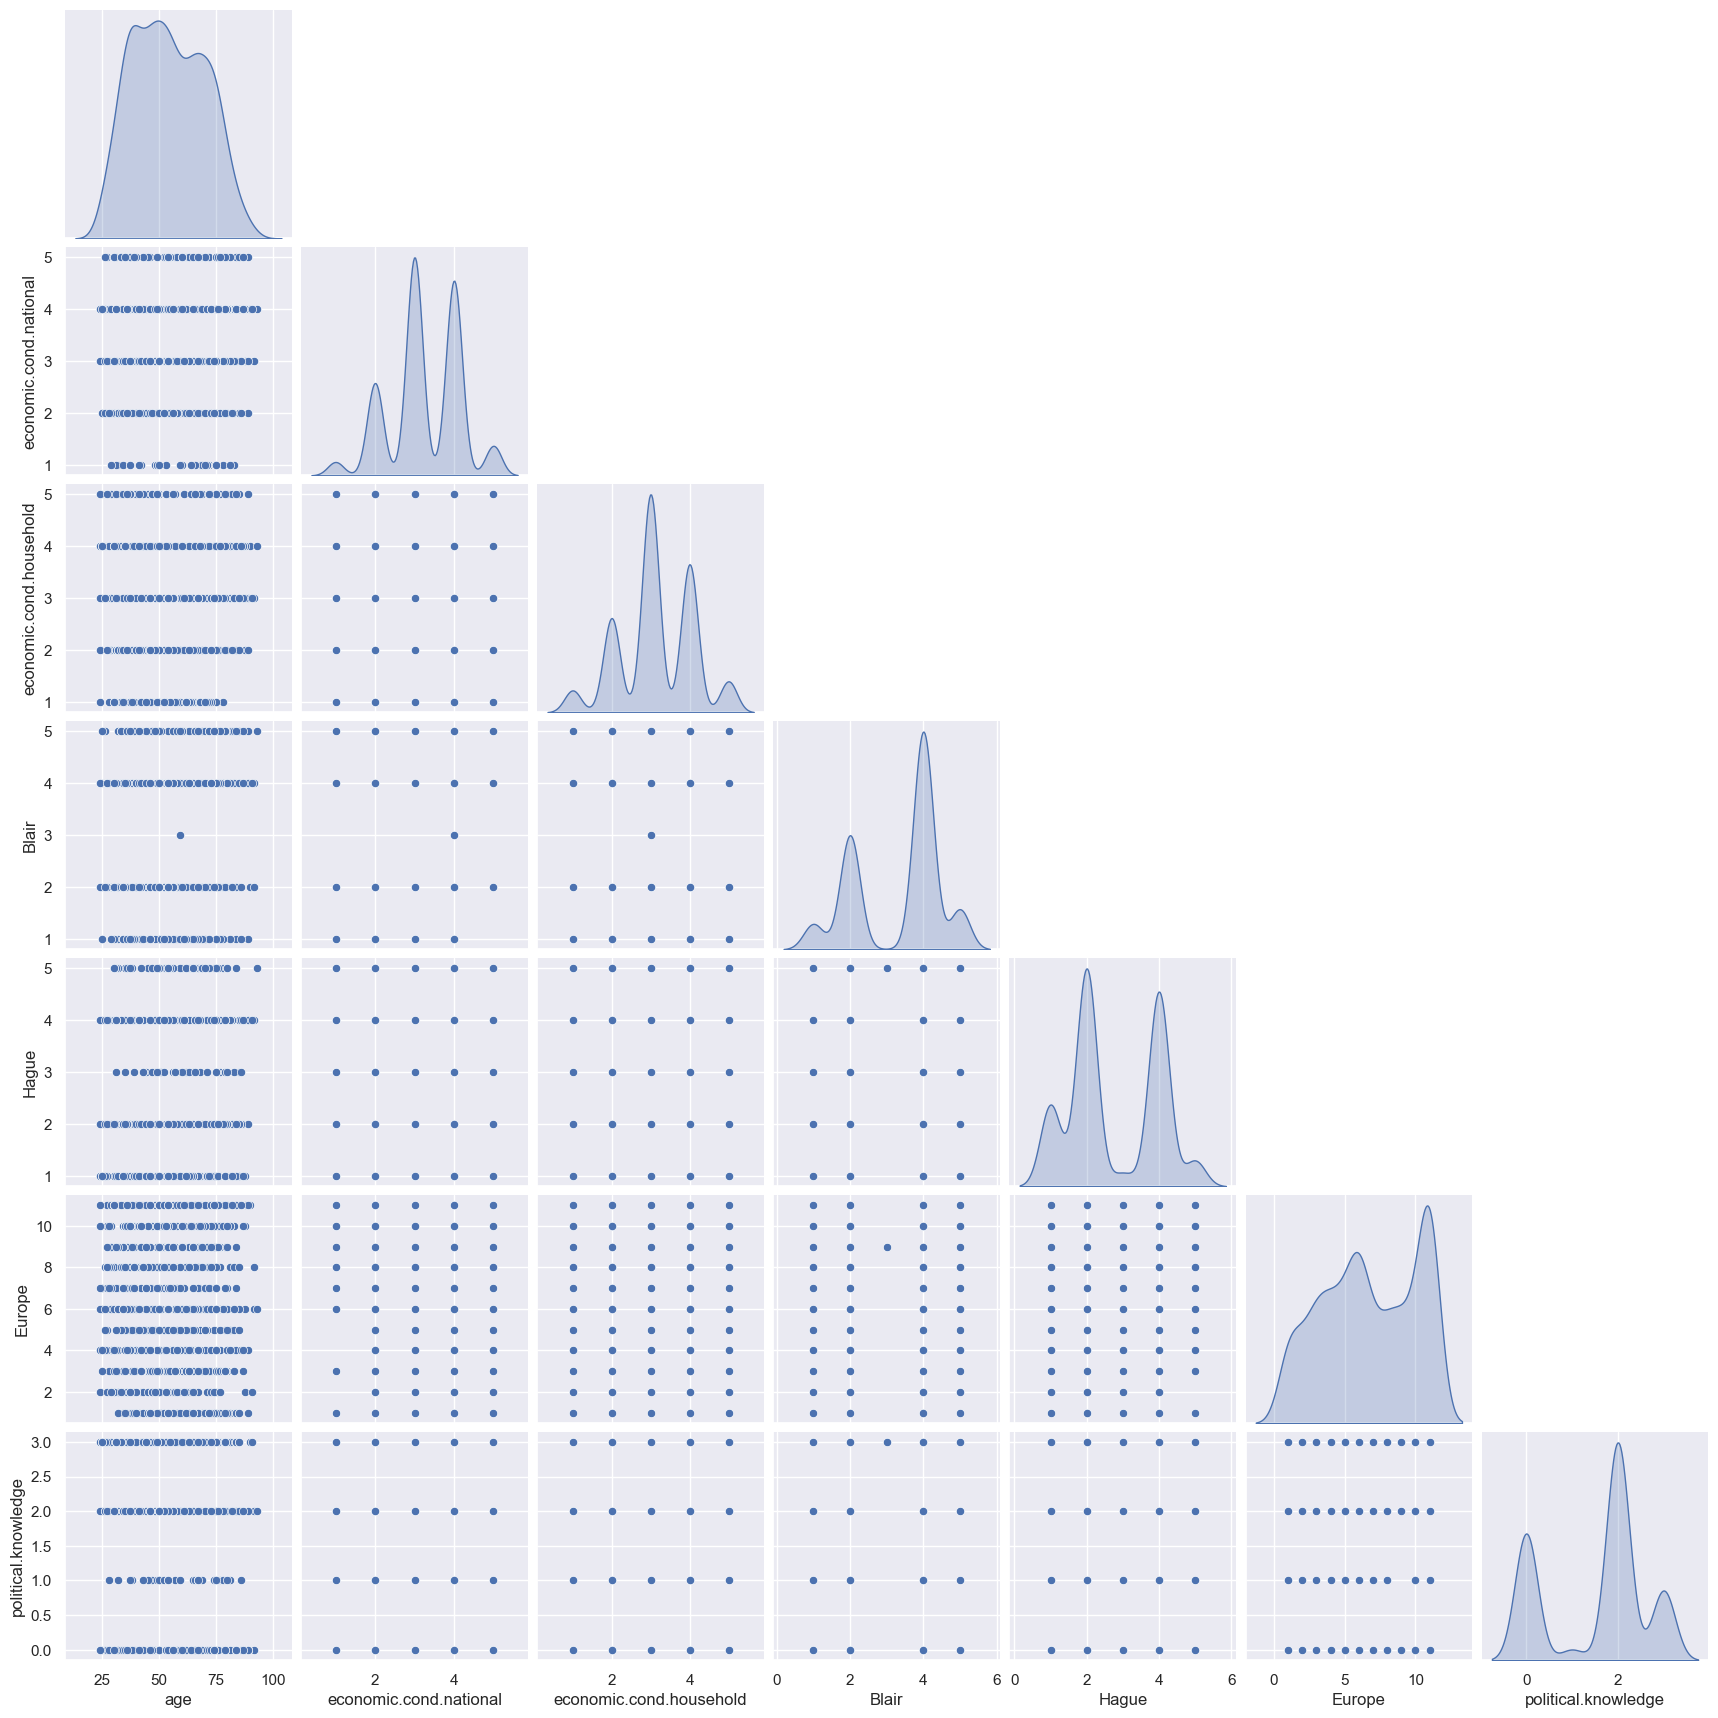

In [26]:
sns.pairplot(el_df,diag_kind='kde',
             corner=True);

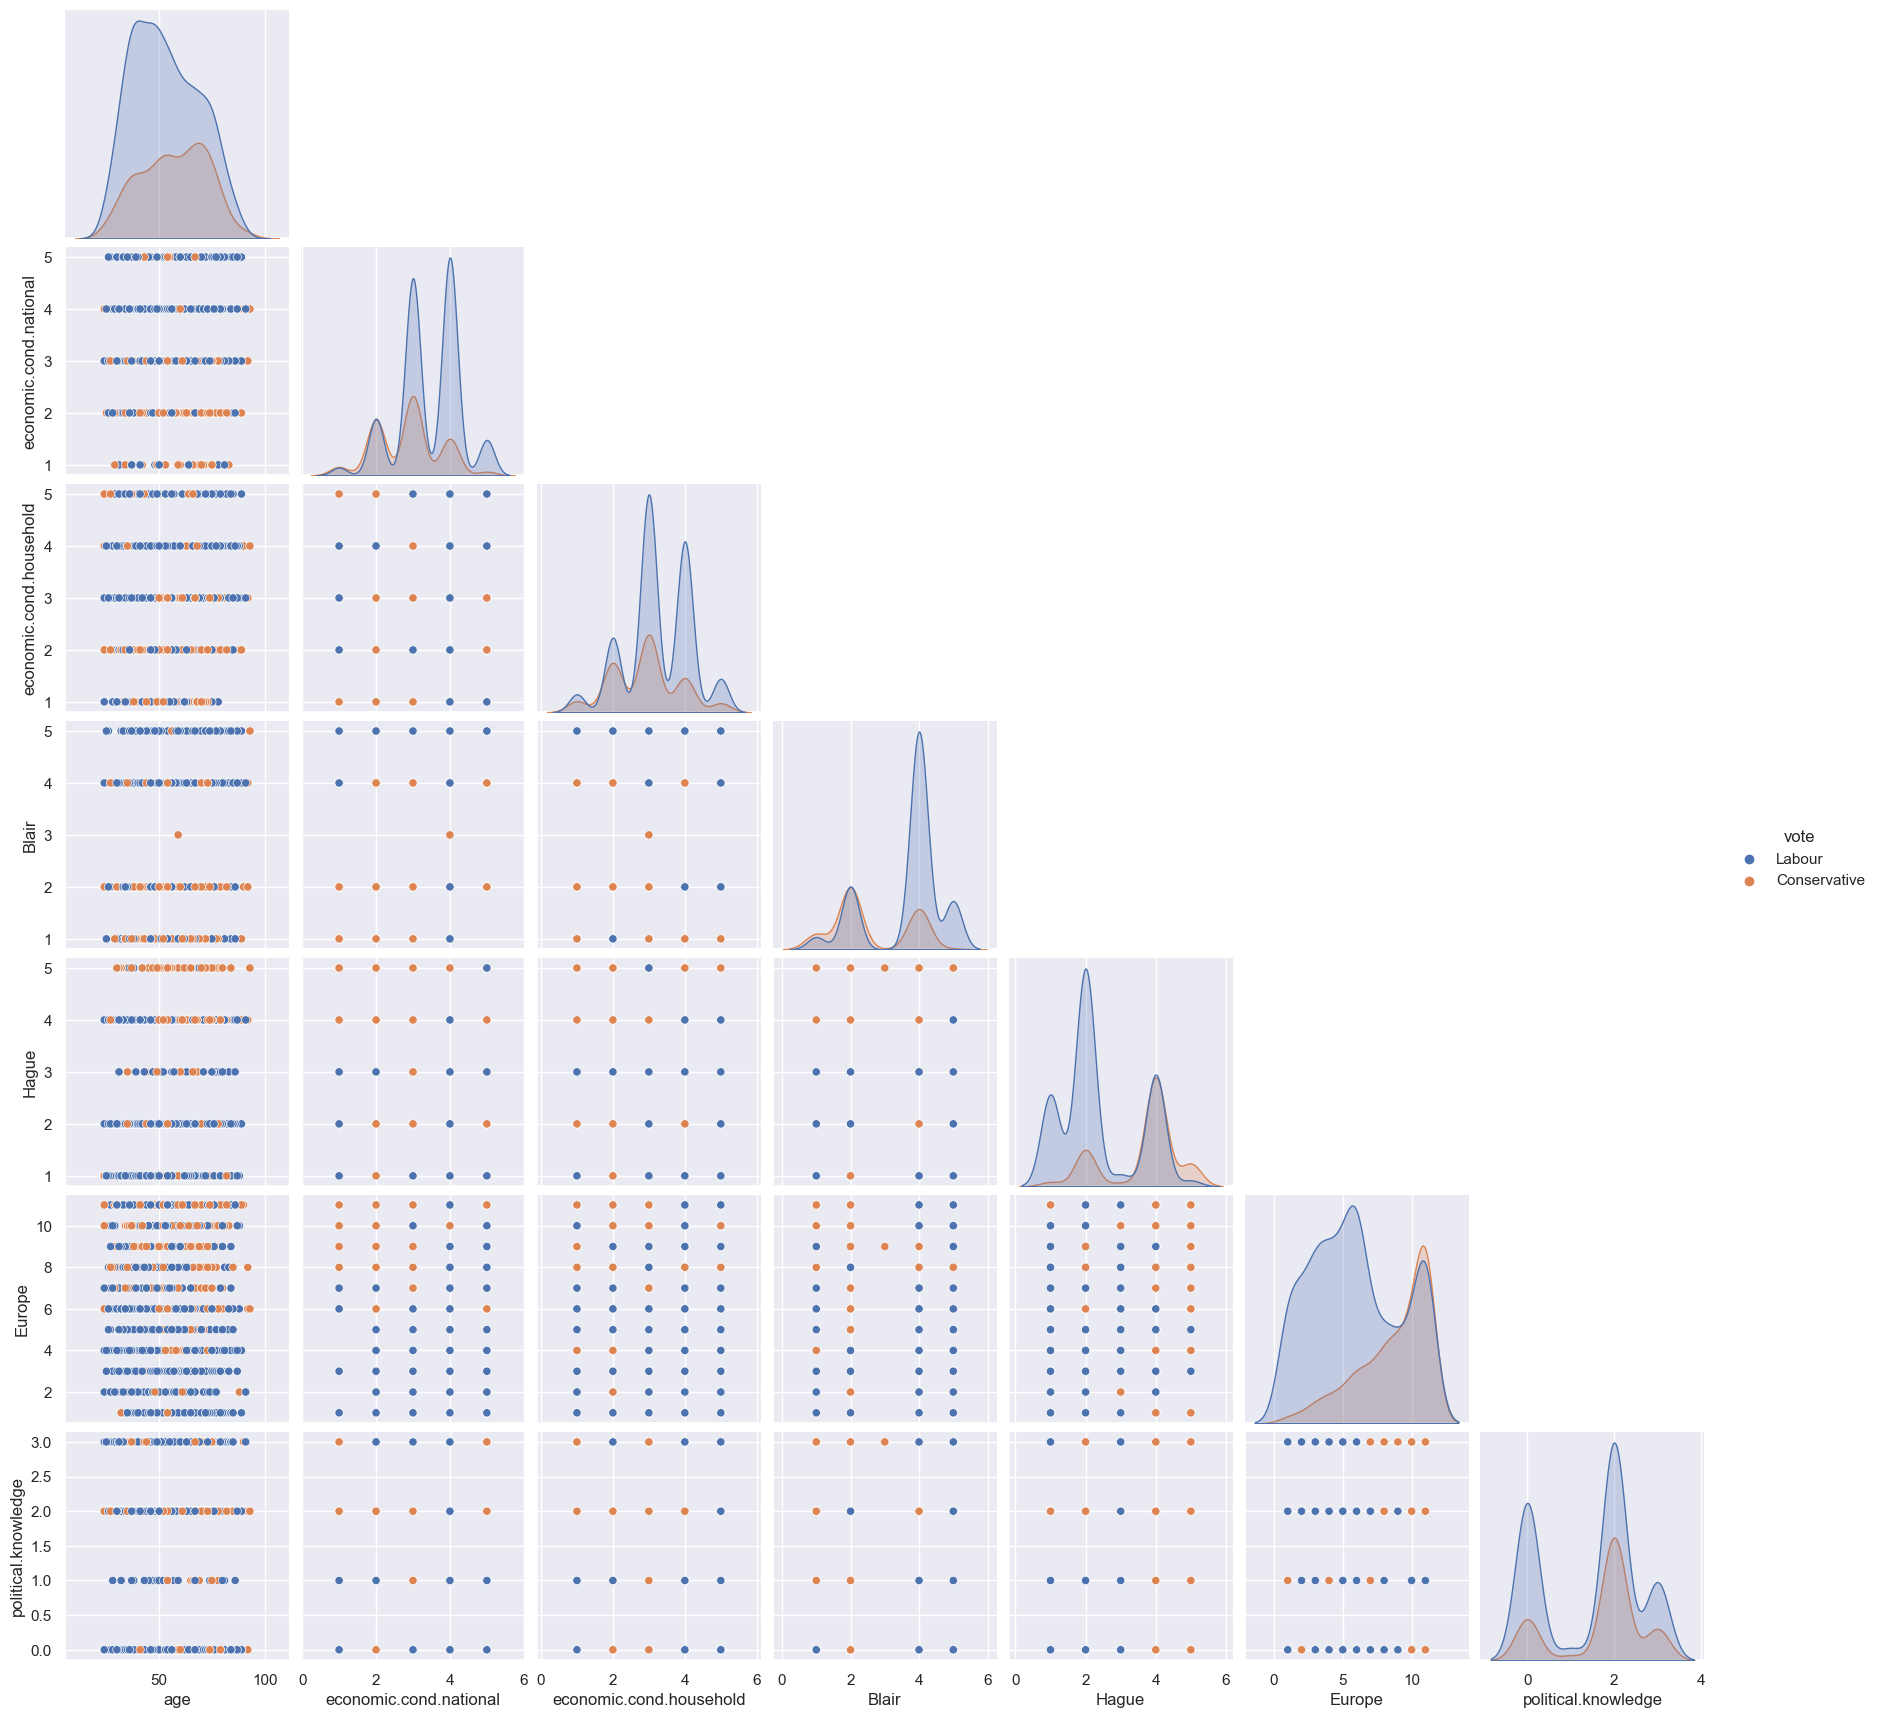

In [27]:
sns.pairplot(el_df, hue='vote', diag_kind='kde',
             corner=True);

#  Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [28]:
#In this dataset most of the categorical variable already encoded except 'Gender' and 'vote' variable.
#here we need to encode the target variable vote and Gender.
#using pd.get dummies methed to encode gender variable 

In [29]:
el_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [30]:
el_df = pd.get_dummies(el_df, columns=['vote','gender',], drop_first=True)

In [31]:
el_df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3,3,4,1,2,2,1,0
1,36,4,4,4,4,5,2,1,1
2,35,4,4,5,2,3,2,1,1
3,24,4,2,2,1,4,0,1,0
4,41,2,2,1,1,6,2,1,1


# Train-Test Split

In [32]:
# Copy all the predictor variables into X dataframe
X = el_df.drop('vote_Labour', axis=1)
# Copy target into the y dataframe.  
y = el_df['vote_Labour']

In [33]:
# Split X and y into training and test set in 75:30 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Checking Target Variable class proportion.

In [37]:
y_train.value_counts(1)*100

1    68.884724
0    31.115276
Name: vote_Labour, dtype: float64

In [38]:
y_test.value_counts(1)

1    0.716157
0    0.283843
Name: vote_Labour, dtype: float64

#  Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

# Logistic Regression Model

In [39]:
from sklearn.metrics import plot_confusion_matrix, classification_report, recall_score,precision_score,f1_score 

In [40]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',
                           max_iter=10000,
                           penalty='none',
                           verbose=True,
                           n_jobs=2,
                           random_state=123)


model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    9.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', random_state=123,
                   solver='newton-cg', verbose=True)

# Prediction on Train & Test Dataset

# Class Label Prediction

In [41]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [42]:
ytrain_predict[:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=uint8)

In [43]:
ytest_predict[:10]

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=uint8)

# Class Probability Prediction

In [44]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.933648,0.066352
1,0.689193,0.310807
2,0.333480,0.666520
3,0.477407,0.522593
4,0.157152,0.842848


# Model Evaluation

# Training Data

# Accuracy

In [45]:
## Performance Matrix on train data set
log_train_predict = model.predict(X_train)
log_train_score = model.score(X_train, y_train) # acc score
log_train_recall_score = recall_score(y_train,log_train_predict)
log_train_precision_score = precision_score(y_train,log_train_predict)
log_train_f1_score = f1_score(y_train,log_train_predict)
print(log_train_score,log_train_recall_score,log_train_precision_score,log_train_f1_score)

0.8406747891283973 0.9074829931972789 0.8673602080624188 0.886968085106383


In [46]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8406747891283973

# AUC and ROC for the training data

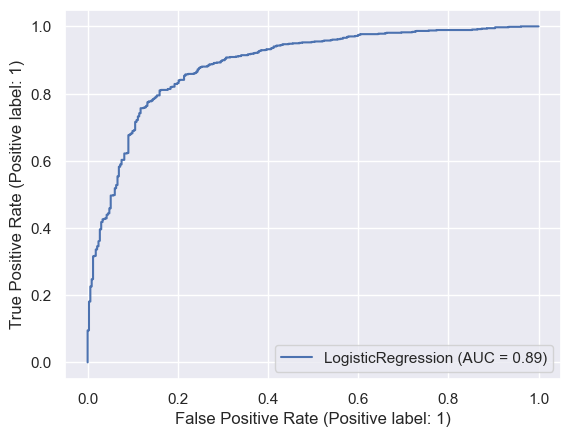

In [47]:
RocCurveDisplay.from_estimator(model,X_train,y_train);

# Confusion Matrix & Classification Report Metrics

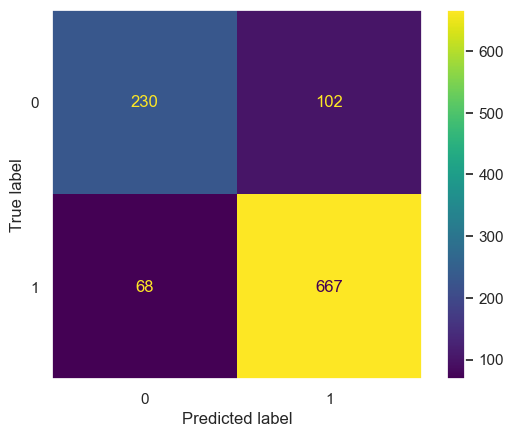

In [48]:
ConfusionMatrixDisplay.from_estimator(model,X_train,y_train)
plt.grid();

In [49]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



# Test Data

In [50]:
## Performance Matrix on test data set
log_test_predict = model.predict(X_test)
log_test_score = model.score(X_test, y_test)
log_test_recall_score = recall_score(y_test,log_test_predict)
log_test_precision_score = precision_score(y_test,log_test_predict)
log_test_f1_score = f1_score(y_test,log_test_predict)
print(log_test_score,log_test_recall_score,log_test_precision_score,log_test_f1_score)

0.8231441048034934 0.8902439024390244 0.8664688427299704 0.8781954887218046


# Accuracy

In [51]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8231441048034934

# AUC and ROC

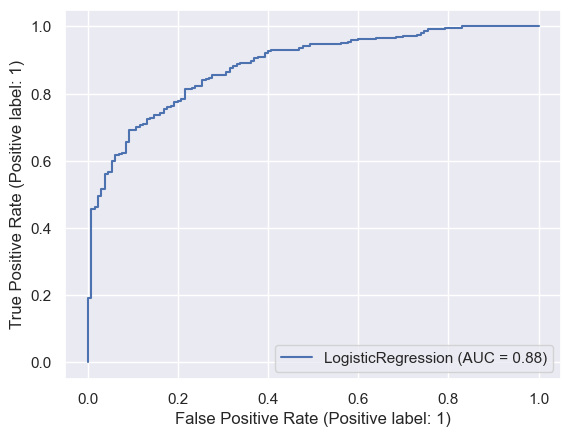

In [52]:
RocCurveDisplay.from_estimator(model,X_test,y_test); 

# Confusion Matrix & Classification Report Metrics


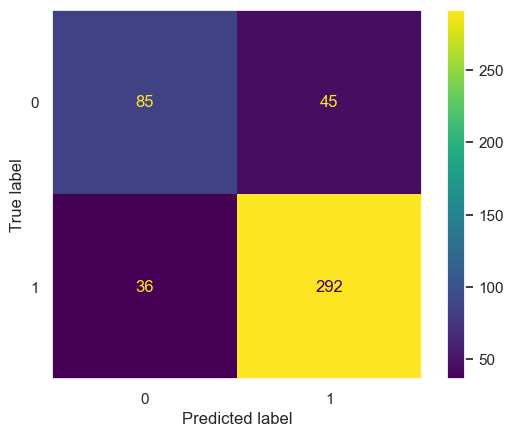

In [53]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.grid();

In [54]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



# Linear Discriminant Analysis

In [55]:
#Build LDA Model & fit on training data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)


LinearDiscriminantAnalysis()

# Prediction

In [56]:
#get the class labels prediction on train & test data and save it
pred_train = lda.predict(X_train)
pred_test = lda.predict(X_test)

# Model Evaluation

# Training Data

In [57]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)

In [58]:
## Performance Matrix on train data set
lda_train_predict = lda.predict(X_train)
lda_train_score = lda.score(X_train, y_train) # acc score
lda_train_recall_score = recall_score(y_train,lda_train_predict)
lda_train_precision_score = precision_score(y_train,lda_train_predict)
lda_train_f1_score = f1_score(y_train,lda_train_predict)
print(lda_train_score,lda_train_recall_score,lda_train_precision_score,lda_train_f1_score)

0.8369259606373008 0.8979591836734694 0.8695652173913043 0.8835341365461847


In [59]:
lda.score(X_train, y_train)

0.8369259606373008

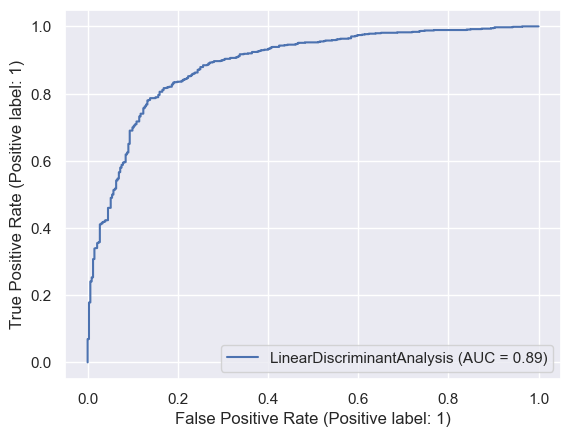

In [60]:
RocCurveDisplay.from_estimator(lda,X_train,y_train);

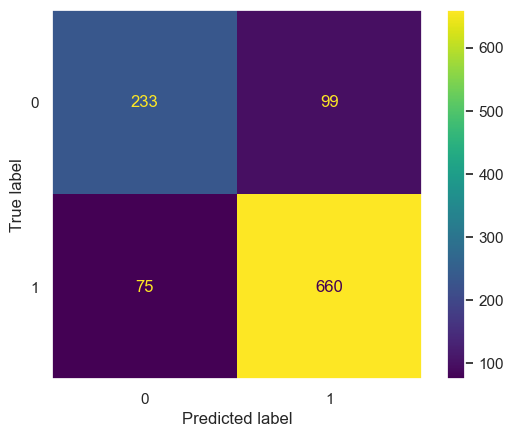

In [61]:
ConfusionMatrixDisplay.from_estimator(lda,X_train,y_train)
plt.grid();

In [62]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



# Test Data

In [63]:
## Performance Matrix on test data set
lda_test_predict = lda.predict(X_test)
lda_test_score = lda.score(X_test, y_test)
lda_test_recall_score = recall_score(y_test,lda_test_predict)
lda_test_precision_score = precision_score(y_test,lda_test_predict)
lda_test_f1_score = f1_score(y_test,lda_test_predict)
print(lda_test_score,lda_test_recall_score,lda_test_precision_score,lda_test_f1_score)

0.8187772925764192 0.8810975609756098 0.8678678678678678 0.8744326777609682


In [64]:
lda.score(X_test, y_test)

0.8187772925764192

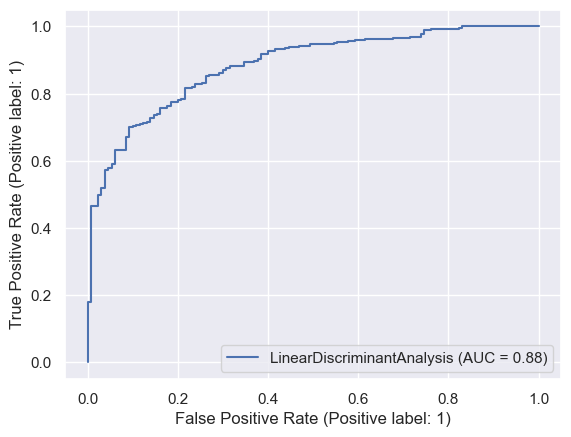

In [65]:
RocCurveDisplay.from_estimator(lda,X_test,y_test);

# Confusion Matrix & Classification Report Metrics

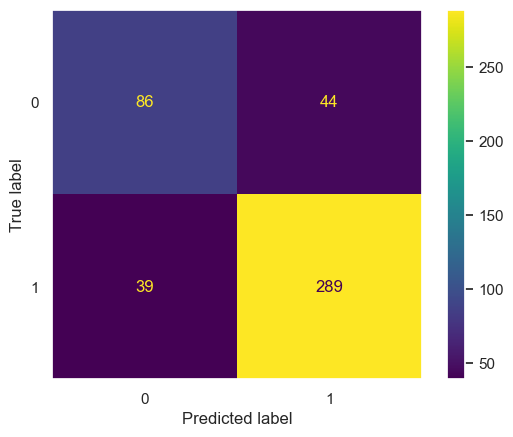

In [66]:
ConfusionMatrixDisplay.from_estimator(lda,X_test,y_test)
plt.grid();

In [67]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



#  Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

# Naive Bayes Model

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, classification_report, recall_score,precision_score,f1_score 

In [69]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

# Training Performance

In [70]:
## Performance Matrix on train data set
NB_train_predict = NB_model.predict(X_train)
NB_train_score = NB_model.score(X_train, y_train) # acc score
NB_train_recall_score = recall_score(y_train,NB_train_predict)
NB_train_precision_score = precision_score(y_train,NB_train_predict)
NB_train_f1_score = f1_score(y_train,NB_train_predict)
print(NB_train_score,NB_train_recall_score,NB_train_precision_score,NB_train_f1_score)

0.8331771321462043 0.8829931972789116 0.8758434547908233 0.8794037940379404


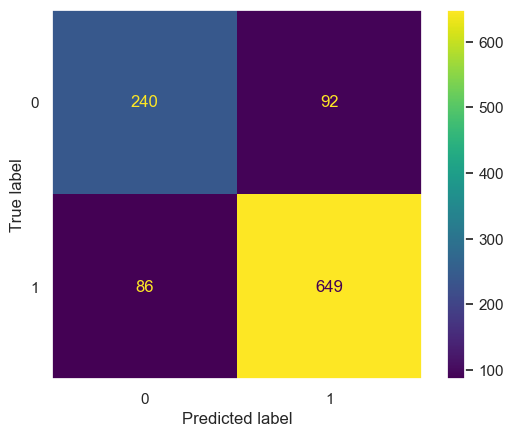

In [71]:
plot_confusion_matrix(NB_model,X_train,y_train);
plt.grid(b=False,axis='both');

In [72]:
print(classification_report(y_train, NB_train_predict))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



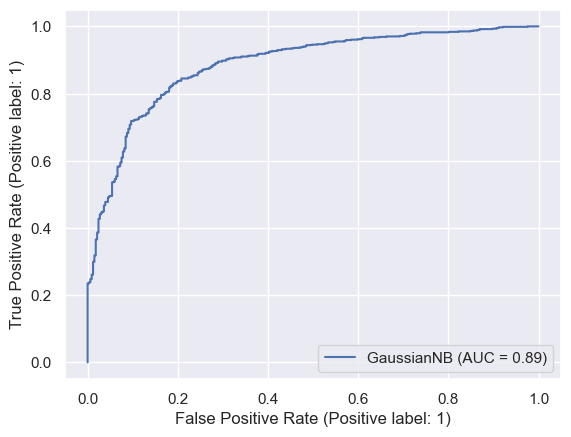

In [73]:
RocCurveDisplay.from_estimator(NB_model,X_train,y_train);

# Test Performance

In [74]:
## Performance Matrix on test data set
NB_test_predict = NB_model.predict(X_test)
NB_test_score = NB_model.score(X_test, y_test)
NB_test_recall_score = recall_score(y_test,NB_test_predict)
NB_test_precision_score = precision_score(y_test,NB_test_predict)
NB_test_f1_score = f1_score(y_test,NB_test_predict)
print(NB_test_score,NB_test_recall_score,NB_test_precision_score,NB_test_f1_score)

0.8253275109170306 0.8658536585365854 0.8875 0.8765432098765432


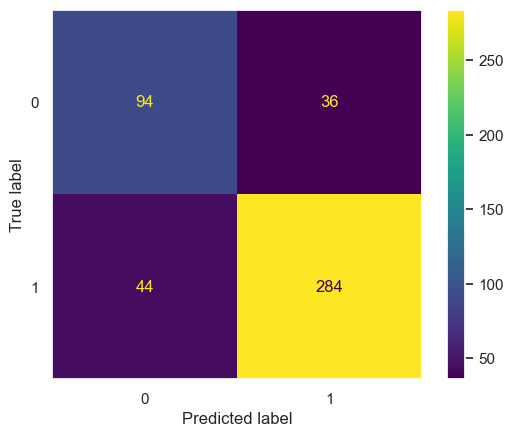

In [75]:
plot_confusion_matrix(NB_model, X_test, y_test)
plt.grid(b=False);

In [76]:
print(classification_report(y_test, NB_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



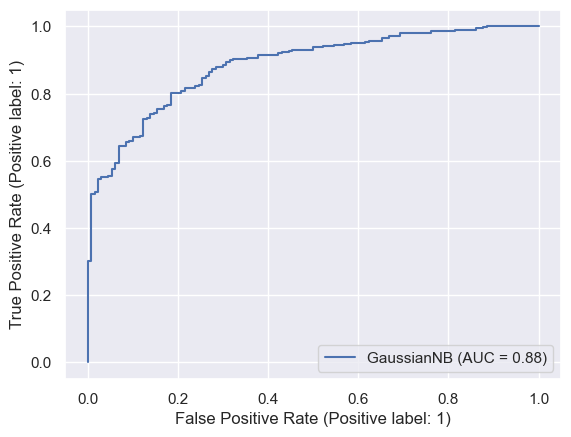

In [77]:
RocCurveDisplay.from_estimator(NB_model,X_test,y_test);

# KNN Model

We do not want our algorithm to be affected by the magnitude of these variables. The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale. One of the most common technique to do so is normalization where we calculate the mean and standard deviation of the variable. Then for each observation, we subtract the mean and then divide by the standard deviation of that variable

In [78]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

# Training Performance

In [79]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score = recall_score(y_train,KNN_train_predict)
KNN_train_precision_score = precision_score(y_train,KNN_train_predict)
KNN_train_f1_score = f1_score(y_train,KNN_train_predict)
print(KNN_train_score,KNN_train_recall_score,KNN_train_precision_score,KNN_train_f1_score)

0.865979381443299 0.9142857142857143 0.8936170212765957 0.9038332212508405


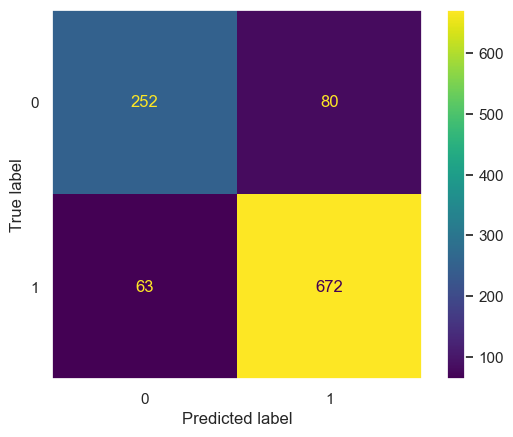

In [80]:
plot_confusion_matrix(KNN_model,X_train,y_train)
plt.grid(b=False);

In [81]:
print(classification_report(y_train, KNN_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       332
           1       0.89      0.91      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.84      1067
weighted avg       0.86      0.87      0.86      1067



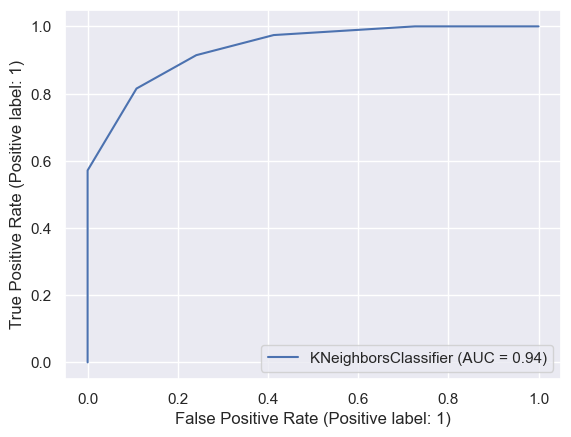

In [82]:
RocCurveDisplay.from_estimator(KNN_model,X_train,y_train);

# Test Performance

In [83]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score = recall_score(y_test,KNN_test_predict)
KNN_test_precision_score = precision_score(y_test,KNN_test_predict)
KNN_test_f1_score = f1_score(y_test,KNN_test_predict)
print(KNN_test_score,KNN_test_recall_score,KNN_test_precision_score,KNN_test_f1_score)

0.8231441048034934 0.8597560975609756 0.889589905362776 0.8744186046511628


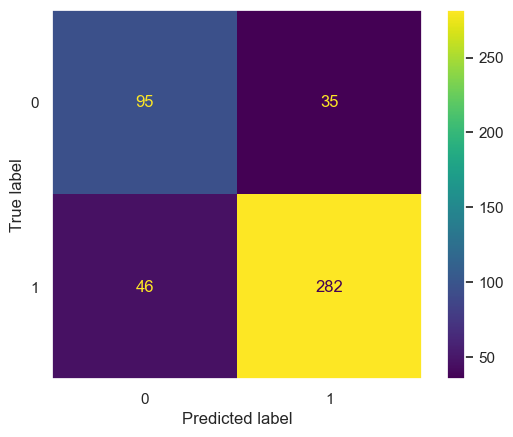

In [84]:
plot_confusion_matrix(KNN_model,X_test, y_test)
plt.grid(b=False);

In [85]:
print(classification_report(y_test, KNN_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.82      0.83       458



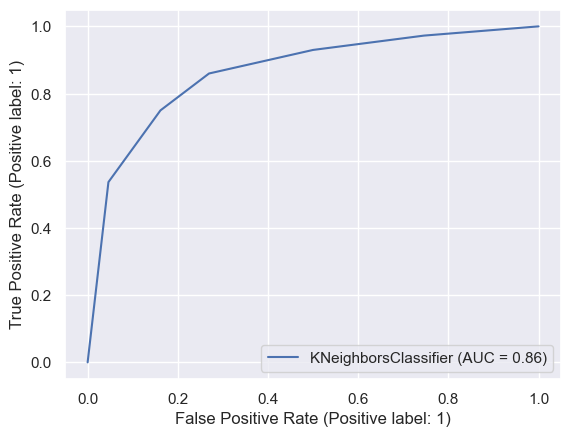

In [86]:
RocCurveDisplay.from_estimator(KNN_model,X_test,y_test);

# KNN model 2

In [87]:
KNN_model_2=KNeighborsClassifier(n_neighbors=7)
KNN_model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

# Training Performance

In [88]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model_2.predict(X_train)
KNN_train_score = KNN_model_2.score(X_train, y_train)
KNN_train_recall_score = recall_score(y_train,KNN_train_predict)
KNN_train_precision_score = precision_score(y_train,KNN_train_predict)
KNN_train_f1_score = f1_score(y_train,KNN_train_predict)
print(KNN_train_score,KNN_train_recall_score,KNN_train_precision_score,KNN_train_f1_score)

0.8575445173383318 0.9061224489795918 0.8891855807743658 0.8975741239892183


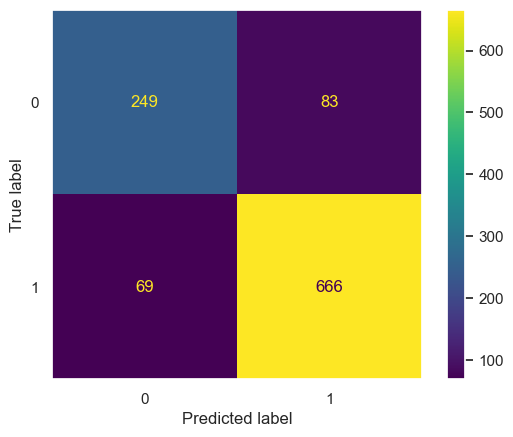

In [89]:
plot_confusion_matrix(KNN_model_2,X_train,y_train)
plt.grid(b=False);

In [90]:
print(classification_report(y_train, KNN_train_predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       332
           1       0.89      0.91      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.83      1067
weighted avg       0.86      0.86      0.86      1067



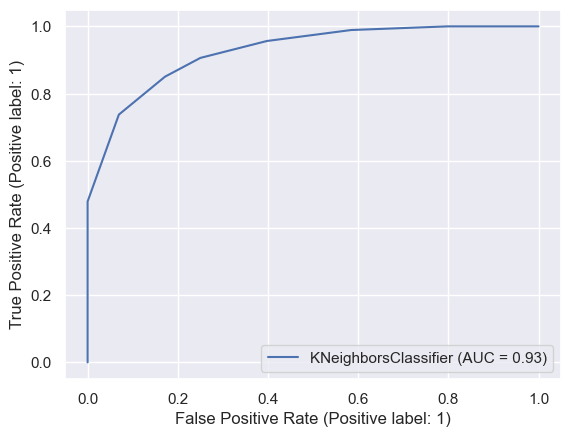

In [91]:
RocCurveDisplay.from_estimator(KNN_model_2,X_train,y_train);

# Test Performance

In [92]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model_2.predict(X_test)
KNN_test_score = KNN_model_2.score(X_test, y_test)
KNN_test_recall_score = recall_score(y_test,KNN_test_predict)
KNN_test_precision_score = precision_score(y_test,KNN_test_predict)
KNN_test_f1_score = f1_score(y_test,KNN_test_predict)
print(KNN_test_score,KNN_test_recall_score,KNN_test_precision_score,KNN_test_f1_score)

0.8362445414847162 0.8719512195121951 0.896551724137931 0.8840803709428129


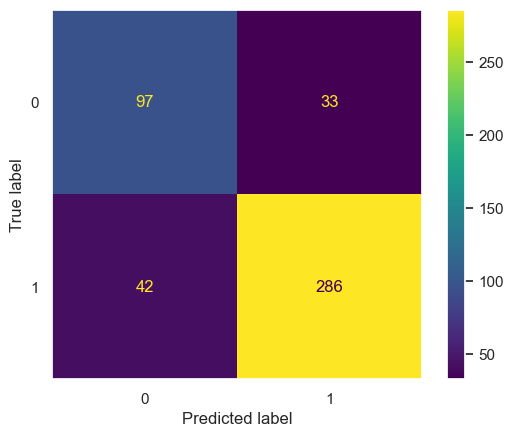

In [93]:
plot_confusion_matrix(KNN_model_2,X_test, y_test)
plt.grid(b=False);

In [94]:
print(classification_report(y_test, KNN_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72       130
           1       0.90      0.87      0.88       328

    accuracy                           0.84       458
   macro avg       0.80      0.81      0.80       458
weighted avg       0.84      0.84      0.84       458



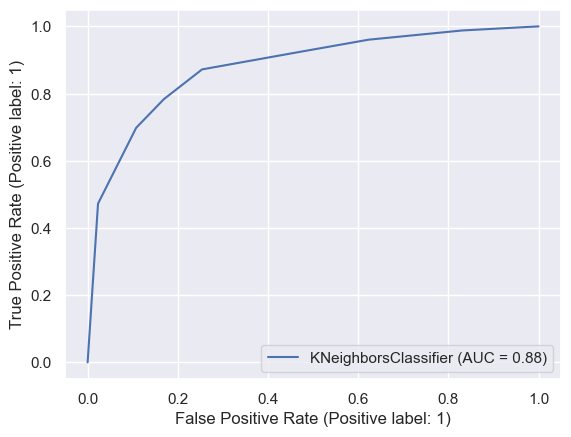

In [95]:
RocCurveDisplay.from_estimator(KNN_model_2,X_test,y_test);

# KNN model 3

In [96]:
KNN_model_3=KNeighborsClassifier(n_neighbors=5)
KNN_model_3.fit(X_train,y_train)

KNeighborsClassifier()

# Training Performance

In [97]:
## Performance Matrix on train data set
KNN_train_predict = KNN_model_3.predict(X_train)
KNN_train_score = KNN_model_3.score(X_train, y_train)
KNN_train_recall_score = recall_score(y_train,KNN_train_predict)
KNN_train_precision_score = precision_score(y_train,KNN_train_predict)
KNN_train_f1_score = f1_score(y_train,KNN_train_predict)
print(KNN_train_score,KNN_train_recall_score,KNN_train_precision_score,KNN_train_f1_score)

0.865979381443299 0.9142857142857143 0.8936170212765957 0.9038332212508405


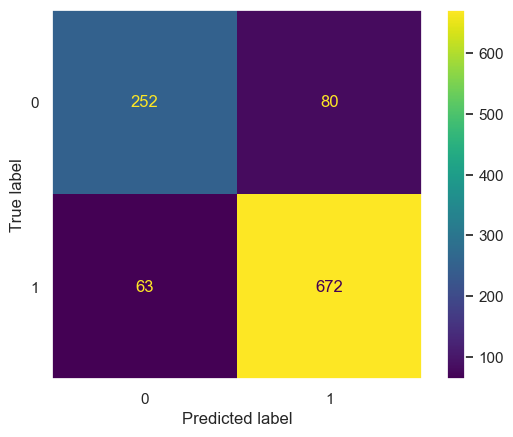

In [98]:
plot_confusion_matrix(KNN_model_3,X_train,y_train)
plt.grid(b=False);

In [99]:
print(classification_report(y_train, KNN_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       332
           1       0.89      0.91      0.90       735

    accuracy                           0.87      1067
   macro avg       0.85      0.84      0.84      1067
weighted avg       0.86      0.87      0.86      1067



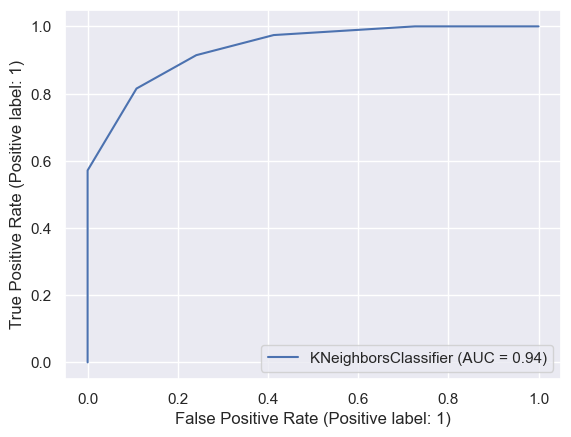

In [100]:
RocCurveDisplay.from_estimator(KNN_model_3,X_train,y_train);

# Test Performance

In [101]:
## Performance Matrix on test data set
KNN_test_predict = KNN_model_3.predict(X_test)
KNN_test_score = KNN_model_3.score(X_test, y_test)
KNN_test_recall_score = recall_score(y_test,KNN_test_predict)
KNN_test_precision_score = precision_score(y_test,KNN_test_predict)
KNN_test_f1_score = f1_score(y_test,KNN_test_predict)
print(KNN_test_score,KNN_test_recall_score,KNN_test_precision_score,KNN_test_f1_score)

0.8231441048034934 0.8597560975609756 0.889589905362776 0.8744186046511628


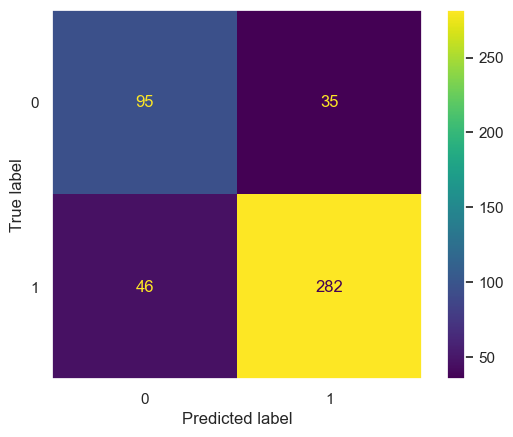

In [102]:
plot_confusion_matrix(KNN_model,X_test, y_test)
plt.grid(b=False);

In [103]:
print(classification_report(y_test, KNN_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       130
           1       0.89      0.86      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.83      0.82      0.83       458



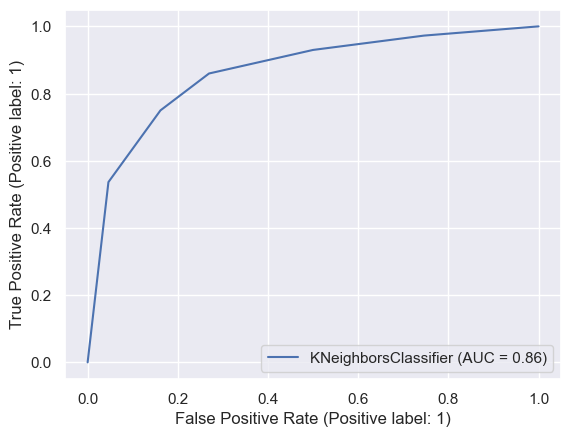

In [104]:
RocCurveDisplay.from_estimator(KNN_model_3,X_test,y_test);

#  Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

#  Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts).

# Bagging

In [105]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,
                                n_estimators=100,
                                random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

# Training Performance

In [106]:
## Performance Matrix on train data set
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score = recall_score(y_train,Bagging_train_predict)
Bagging_train_precision_score = precision_score(y_train,Bagging_train_predict)
Bagging_train_f1_score = f1_score(y_train,Bagging_train_predict)
print(Bagging_train_score, Bagging_train_recall_score,Bagging_train_precision_score,Bagging_train_f1_score)

0.9990627928772259 1.0 0.998641304347826 0.9993201903467028


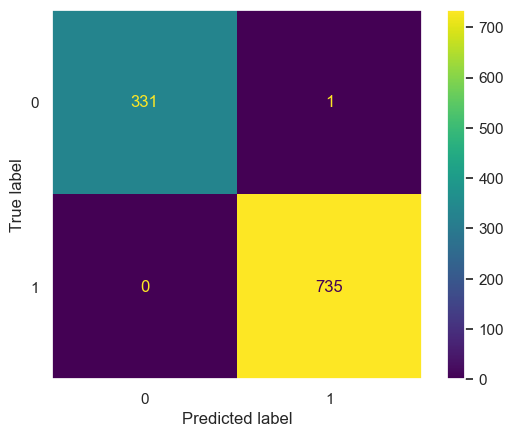

In [107]:
plot_confusion_matrix(Bagging_model,X_train, y_train)
plt.grid(b=False);

In [108]:
print(classification_report(y_train, Bagging_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



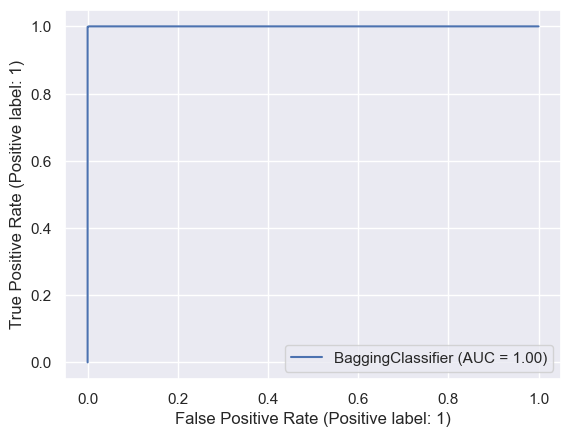

In [109]:
RocCurveDisplay.from_estimator(Bagging_model,X_train,y_train);

# Test Performance

In [110]:
## Performance Matrix on test data set
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score = recall_score(y_test, Bagging_test_predict)
Bagging_test_precision_score = precision_score(y_test, Bagging_test_predict)
Bagging_test_f1_score = f1_score(y_test, Bagging_test_predict)
print(Bagging_test_score, Bagging_test_recall_score,Bagging_test_precision_score,Bagging_test_f1_score)

0.7991266375545851 0.8597560975609756 0.8597560975609756 0.8597560975609756


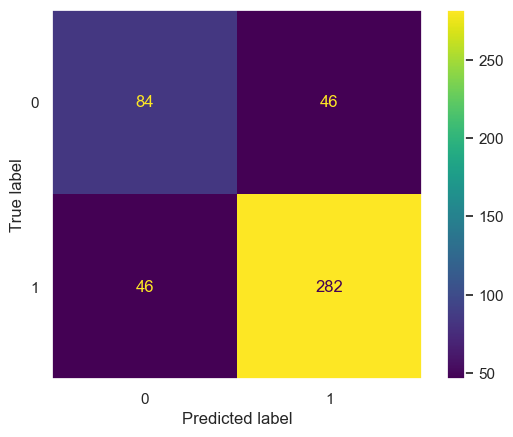

In [111]:
plot_confusion_matrix(Bagging_model,X_test,y_test)
plt.grid(b=False);

In [112]:
print(classification_report(y_test, Bagging_test_predict))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



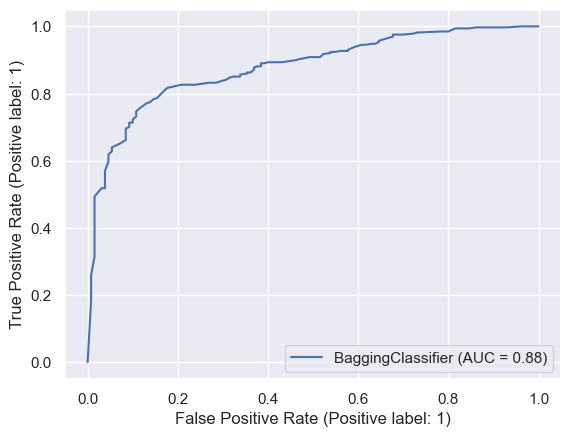

In [113]:
RocCurveDisplay.from_estimator(Bagging_model,X_test,y_test);

# Ada Boost

In [114]:
from sklearn.ensemble import AdaBoostClassifier

In [115]:
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

# Training Performance

In [116]:
## Performance Matrix on train data set
ADB_train_predict = ADB_model.predict(X_train)
ADB_train_score = ADB_model.score(X_train, y_train)
ADB_train_recall_score = recall_score(y_train,ADB_train_predict)
ADB_train_precision_score = precision_score(y_train,ADB_train_predict)
ADB_train_f1_score = f1_score(y_train,ADB_train_predict)
print(ADB_train_score,ADB_train_recall_score,ADB_train_precision_score,ADB_train_f1_score)

0.8472352389878163 0.9061224489795918 0.8763157894736842 0.8909698996655518


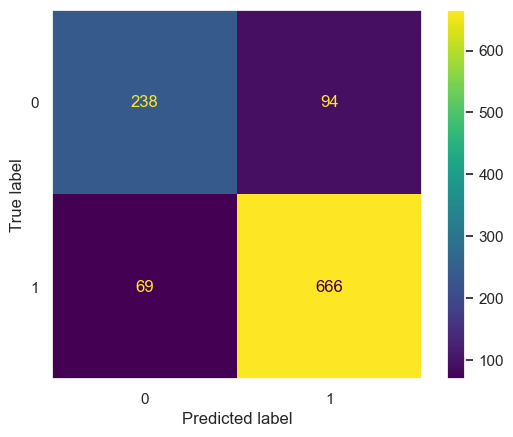

In [117]:
plot_confusion_matrix(ADB_model,X_train,y_train);
plt.grid(b=False);

In [118]:
print(classification_report(y_train, ADB_train_predict))

              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



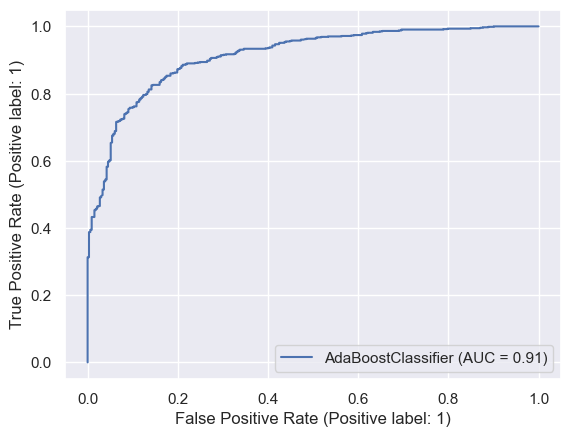

In [119]:
RocCurveDisplay.from_estimator(ADB_model,X_train,y_train);

# Test Performance

In [120]:
## Performance Matrix on test data set
ADB_test_predict = ADB_model.predict(X_test)
ADB_test_score = ADB_model.score(X_test, y_test)
ADB_test_recall_score = recall_score(y_test,ADB_test_predict)
ADB_test_precision_score = precision_score(y_test,ADB_test_predict)
ADB_test_f1_score = f1_score(y_test,ADB_test_predict)
print(ADB_test_score,ADB_test_recall_score,ADB_test_precision_score,ADB_test_f1_score)

0.8187772925764192 0.8689024390243902 0.8769230769230769 0.8728943338437979


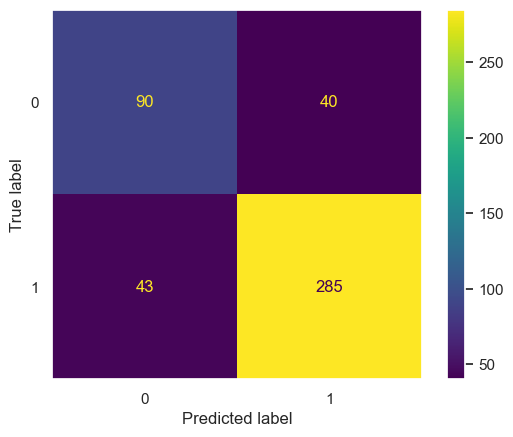

In [121]:
plot_confusion_matrix(ADB_model,X_test,y_test)
plt.grid(b=False);

In [122]:
print(classification_report(y_test, ADB_test_predict))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



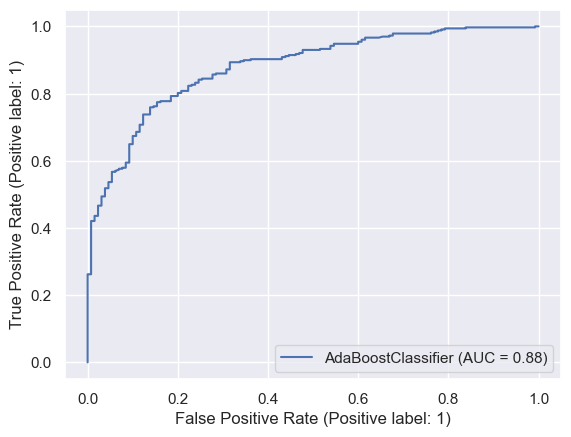

In [123]:
RocCurveDisplay.from_estimator(ADB_model,X_test,y_test);

# Gradient Boosting

In [124]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)

In [125]:
gbcl = gbcl.fit(X_train, y_train)

# Training Performance

In [126]:
## Performance Matrix on train data set
gbcl_train_predict = gbcl.predict(X_train)
gbcl_train_score = gbcl.score(X_train, y_train)
gbcl_train_recall_score = recall_score(y_train,gbcl_train_predict)
gbcl_train_precision_score = precision_score(y_train,gbcl_train_predict)
gbcl_train_f1_score = f1_score(y_train,gbcl_train_predict)
print(gbcl_train_score,gbcl_train_recall_score,gbcl_train_precision_score,gbcl_train_f1_score)

0.8865979381443299 0.9306122448979591 0.9071618037135278 0.918737407656145


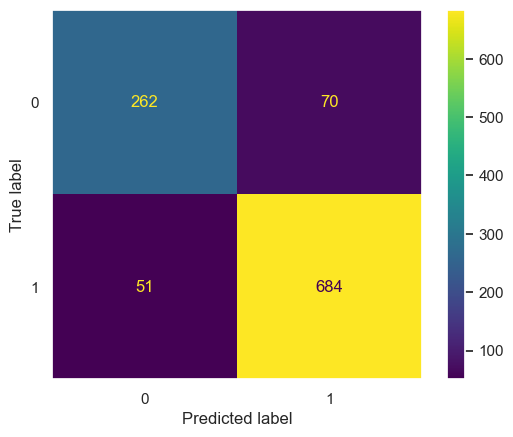

In [127]:
plot_confusion_matrix(gbcl,X_train,y_train)
plt.grid(b=False);

In [128]:
print(classification_report(y_train, gbcl_train_predict))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



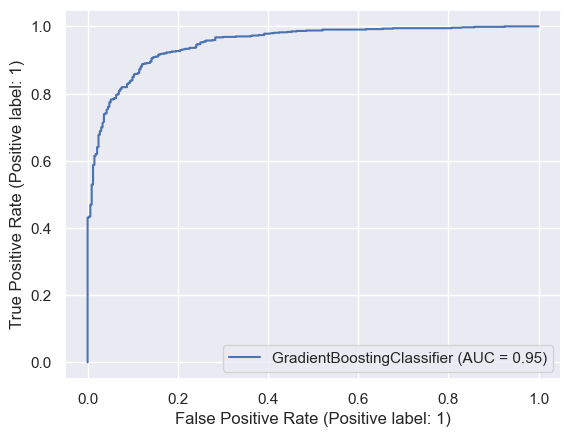

In [129]:
RocCurveDisplay.from_estimator(gbcl,X_train,y_train);

# Test Performance

In [130]:
## Performance Matrix on test data set
gbcl_test_predict = gbcl.predict(X_test)
gbcl_test_score = gbcl.score(X_test, y_test)
gbcl_test_recall_score = recall_score(y_test, gbcl_test_predict)
gbcl_test_precision_score = precision_score(y_test, gbcl_test_predict)
gbcl_test_f1_score = f1_score(y_test, gbcl_test_predict)
print(gbcl_test_score,gbcl_test_recall_score,gbcl_test_precision_score,gbcl_test_f1_score)

0.8318777292576419 0.8689024390243902 0.8934169278996865 0.8809891808346213


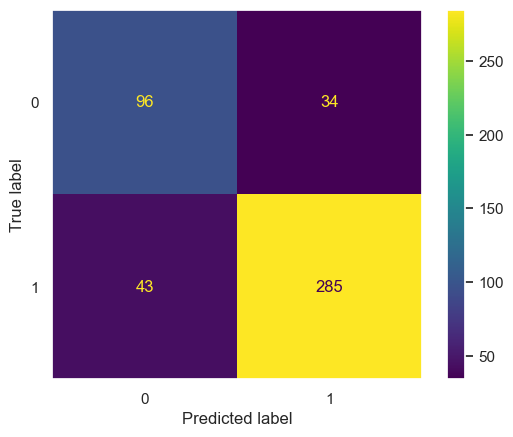

In [131]:
plot_confusion_matrix(gbcl,X_test,y_test)
plt.grid(b=False);

In [132]:
print(classification_report(y_test, gbcl_test_predict))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



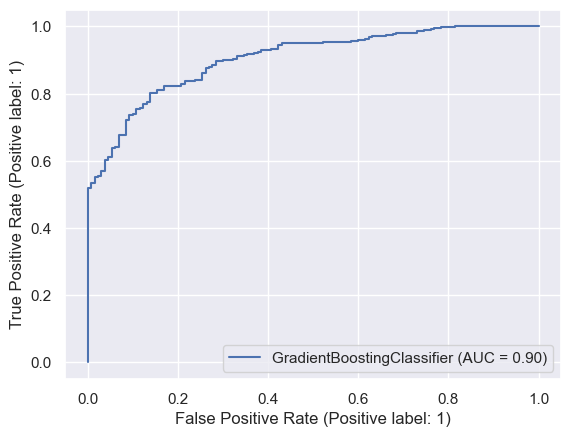

In [133]:
RocCurveDisplay.from_estimator(gbcl,X_test,y_test);

# using GridSearchCV for logistic regression

In [134]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['sag','lbfgs','saga','newton-cg','liblinear'],
      'tol':[0.0001,0.00001], # 0.1, 0.01,0.001,
     'l1_ratio':[0.25,0.5,0.75]} 

In [135]:
model = LogisticRegression(max_iter=10000,
                           n_jobs=2,
                           random_state=1)

In [136]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           cv = 5,
                           n_jobs=-1,
                           scoring='accuracy',)

In [137]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          random_state=1),
             n_jobs=-1,
             param_grid={'l1_ratio': [0.25, 0.5, 0.75],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'saga', 'newton-cg',
                                    'liblinear'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [138]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'l1_ratio': 0.25, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(l1_ratio=0.25, max_iter=10000, n_jobs=2, penalty='l1',
                   random_state=1, solver='liblinear')


In [139]:
# best_model = grid_search.best_estimator_
best_model = grid_search.best_estimator_

## train dataset

In [140]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [141]:
## Performance Matrix on train data set
log_train_predict = best_model.predict(X_train)
log_train_score = best_model.score(X_train, y_train) # acc score
log_train_recall_score = recall_score(y_train,log_train_predict)
log_train_precision_score = precision_score(y_train,log_train_predict)
log_train_f1_score = f1_score(y_train,log_train_predict)
print(log_train_score,log_train_recall_score,log_train_precision_score,log_train_f1_score)

0.8434864104967198 0.908843537414966 0.8697916666666666 0.8888888888888888


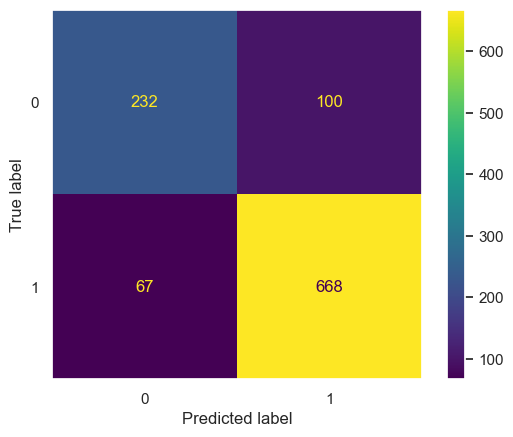

In [142]:
## Confusion matrix on the training data

ConfusionMatrixDisplay.from_estimator(best_model,X_train,y_train)
plt.grid();

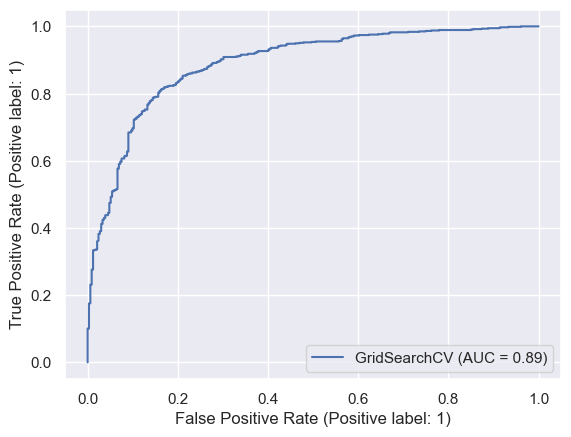

In [143]:
RocCurveDisplay.from_estimator(grid_search,X_train,y_train);

## test dataset

In [144]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.922683,0.077317
1,0.689456,0.310544
2,0.337317,0.662683
3,0.479100,0.520900
4,0.179764,0.820236


In [145]:
## Performance Matrix on test data set
log_test_predict = best_model.predict(X_test)
log_test_score = best_model.score(X_test, y_test)
log_test_recall_score = recall_score(y_test,log_test_predict)
log_test_precision_score = precision_score(y_test,log_test_predict)
log_test_f1_score = f1_score(y_test,log_test_predict)
print(log_test_score,log_test_recall_score,log_test_precision_score,log_test_f1_score)

0.8231441048034934 0.8902439024390244 0.8664688427299704 0.8781954887218046


In [146]:
print(classification_report(y_train, ytrain_predict));

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [147]:
best_model.score(X_train,y_train)

0.8434864104967198

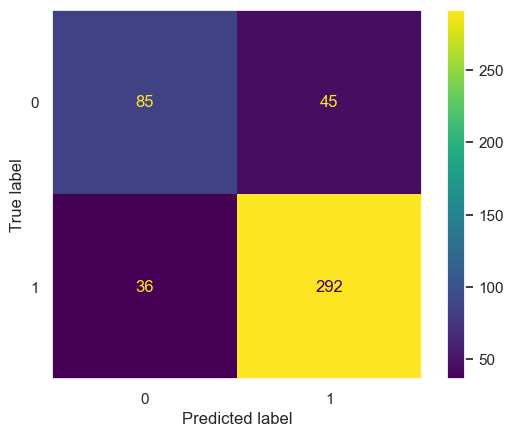

In [148]:
## Confusion matrix on the test data

ConfusionMatrixDisplay.from_estimator(best_model,X_test,y_test)
plt.grid();

In [149]:
print(classification_report(y_test, ytest_predict));

              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



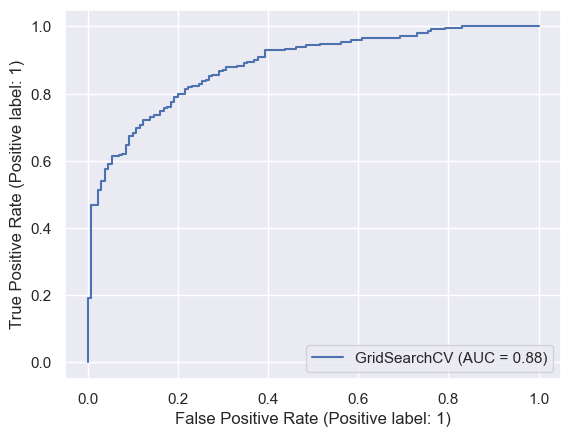

In [150]:
RocCurveDisplay.from_estimator(grid_search,X_test,y_test);


# using GridSearchCV on Linear discriminant analysis 

In [151]:
paramgrid = {'n_components':['int',None],
             'priors':['array-like of shape',None],
             'shrinkage':[None,'auto' or 'float'],
            'solver':['svd','lsqr','eigen'],
             'store_covariance':['bool',False],
             'tol':['float',0.0001]}

In [152]:
model =LinearDiscriminantAnalysis()

In [153]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramgrid, 
                           cv = 5)

In [154]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid={'n_components': ['int', None],
                         'priors': ['array-like of shape', None],
                         'shrinkage': [None, 'auto'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'store_covariance': ['bool', False],
                         'tol': ['float', 0.0001]})

In [155]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'n_components': None, 'priors': None, 'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': 'bool', 'tol': 'float'} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',
                           store_covariance='bool', tol='float')


In [156]:
# best_model = grid_search.best_estimator_
best_model = grid_search.best_estimator_

## train dataset

In [157]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [158]:
## Performance Matrix on train data set
lda_train_predict = best_model.predict(X_train)
lda_train_score = best_model.score(X_train, y_train) # acc score
lda_train_recall_score = recall_score(y_train,lda_train_predict)
lda_train_precision_score = precision_score(y_train,lda_train_predict)
lda_train_f1_score = f1_score(y_train,lda_train_predict)
print(lda_train_score,lda_train_recall_score,lda_train_precision_score,lda_train_f1_score)

0.8406747891283973 0.8965986394557823 0.8751660026560425 0.885752688172043


## test dataset

In [159]:
lda_test_predict = best_model.predict(X_test)
lda_test_score = best_model.score(X_test, y_test)
lda_test_recall_score = recall_score(y_test,lda_test_predict)
lda_test_precision_score = precision_score(y_test,lda_test_predict)
lda_test_f1_score = f1_score(y_test,lda_test_predict)
print(lda_test_score,lda_test_recall_score,lda_test_precision_score,lda_test_f1_score)

0.8231441048034934 0.8780487804878049 0.8753799392097265 0.8767123287671232


In [160]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()


,0,1
0,0.960075,0.039925
1,0.758837,0.241163
2,0.343582,0.656418
3,0.506250,0.493750
4,0.150515,0.849485


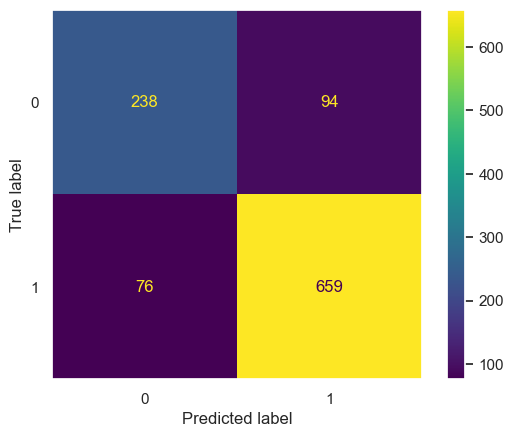

In [161]:
## Confusion matrix on the training data

ConfusionMatrixDisplay.from_estimator(best_model,X_train,y_train)
plt.grid();

In [162]:
print(classification_report(y_train, ytrain_predict));

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       332
           1       0.88      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



# using GridSearchCV on Navie bayes

In [163]:
paramgrid = {'priors':[None,'array-like of shape'],
                       'var_smoothing':[1e-09, float]}

In [164]:
model =GaussianNB()

In [165]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramgrid, 
                           cv = 5)

In [166]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'priors': [None, 'array-like of shape'],
                         'var_smoothing': [1e-09, <class 'float'>]})

In [167]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'priors': None, 'var_smoothing': 1e-09} 

GaussianNB()


In [168]:
# best_model = grid_search.best_estimator_
best_model = grid_search.best_estimator_

## Training data set

In [169]:
## Performance Matrix on train data set
NB_train_predict = best_model.predict(X_train)
NB_train_score = best_model.score(X_train, y_train) # acc score
NB_train_recall_score = recall_score(y_train,NB_train_predict)
NB_train_precision_score = precision_score(y_train,NB_train_predict)
NB_train_f1_score = f1_score(y_train,NB_train_predict)
print(NB_train_score,NB_train_recall_score,NB_train_precision_score,NB_train_f1_score)

0.8331771321462043 0.8829931972789116 0.8758434547908233 0.8794037940379404


## test data set

In [170]:
## Performance Matrix on test data set
NB_test_predict = best_model.predict(X_test)
NB_test_score = best_model.score(X_test, y_test)
NB_test_recall_score = recall_score(y_test,NB_test_predict)
NB_test_precision_score = precision_score(y_test,NB_test_predict)
NB_test_f1_score = f1_score(y_test,NB_test_predict)
print(NB_test_score,NB_test_recall_score,NB_test_precision_score,NB_test_f1_score)

0.8253275109170306 0.8658536585365854 0.8875 0.8765432098765432


# using GridSearchCV on KNN

In [171]:
paramgrid = { 'n_neighbors':[5,'int'],
             'weights':['uniform','distance'],
             'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
             'leaf_size':[30,'int'],
             'p':[2,'int'],
             'metric':['minkowski','str or callable'],
             'metric_params':[None,'dict'],
             'n_jobs':[None,'int']}

In [172]:
model=KNeighborsClassifier()

In [173]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramgrid, 
                           cv = 5)

In [174]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 'int'],
                         'metric': ['minkowski', 'str or callable'],
                         'metric_params': [None, 'dict'],
                         'n_jobs': [None, 'int'], 'n_neighbors': [5, 'int'],
                         'p': [2, 'int'], 'weights': ['uniform', 'distance']})

In [175]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'ball_tree', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'} 

KNeighborsClassifier(algorithm='ball_tree')


In [176]:
# best_model = grid_search.best_estimator_
best_model = grid_search.best_estimator_

## train dataset

In [177]:
## Performance Matrix on train data set
KNN_train_predict = best_model.predict(X_train)
KNN_train_score = best_model.score(X_train, y_train) # acc score
KNN_train_recall_score = recall_score(y_train,KNN_train_predict)
KNN_train_precision_score = precision_score(y_train,KNN_train_predict)
KNN_train_f1_score = f1_score(y_train,KNN_train_predict)
print(KNN_train_score,KNN_train_recall_score,KNN_train_precision_score,KNN_train_f1_score)

0.8650421743205249 0.9129251700680272 0.8934753661784287 0.9030955585464334


## test dataset

In [178]:
## Performance Matrix on test data set
KNN_test_predict = best_model.predict(X_test)
KNN_test_score = best_model.score(X_test, y_test)
KNN_test_recall_score = recall_score(y_test,KNN_test_predict)
KNN_test_precision_score = precision_score(y_test,KNN_test_predict)
KNN_test_f1_score = f1_score(y_test,KNN_test_predict)
print(KNN_test_score,KNN_test_recall_score,KNN_test_precision_score,KNN_test_f1_score)

0.8231441048034934 0.8597560975609756 0.889589905362776 0.8744186046511628


# using GridSearchCV on bagging

In [179]:
Bagging_model=BaggingClassifier(base_estimator=cart,
                                n_estimators=100,
                                random_state=1)

In [180]:
paramgrid = {'base_estimator':[None,'object','cart'],
            'n_estimators':[10,100,1000],
            'max_samples':[1.0,'int'or'float'],
             'max_features':[1.0,'int','float'],
             'bootstrap':[True,'bool'],
             'bootstrap_features':[False,'bool'],
             'oob_score':[False,'bool'],
             'warm_start':[False,'bool'],
             'n_jobs':[None,'int'],
             'random_state':[None],
             'verbose':[0,'int']}

In [181]:
model=BaggingClassifier()

In [182]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramgrid, 
                           cv = 5)

In [183]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'base_estimator': [None, 'object', 'cart'],
                         'bootstrap': [True, 'bool'],
                         'bootstrap_features': [False, 'bool'],
                         'max_features': [1.0, 'int', 'float'],
                         'max_samples': [1.0, 'int'],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [None, 'int'], 'oob_score': [False, 'bool'],
                         'random_state': [None], 'verbose': [0, 'int'],
                         'warm_start': [False, 'bool']})

In [184]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'base_estimator': None, 'bootstrap': 'bool', 'bootstrap_features': 'bool', 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': 'bool'} 

BaggingClassifier(bootstrap='bool', bootstrap_features='bool',
                  n_estimators=1000, warm_start='bool')


In [185]:
# best_model = grid_search.best_estimator_
best_model = grid_search.best_estimator_

In [186]:
## Performance Matrix on train data set
bagging_train_predict = best_model.predict(X_train)
bagging_train_score = best_model.score(X_train, y_train) # acc score
bagging_train_recall_score = recall_score(y_train,bagging_train_predict)
bagging_train_precision_score = precision_score(y_train,bagging_train_predict)
bagging_train_f1_score = f1_score(y_train,bagging_train_predict)
print(bagging_train_score,bagging_train_recall_score,bagging_train_precision_score,bagging_train_f1_score)

0.9915651358950328 0.998639455782313 0.9892183288409704 0.993906567366283


## test dataset

In [187]:
## Performance Matrix on test data set
bagging_test_predict = best_model.predict(X_test)
bagging_test_score = best_model.score(X_test, y_test)
bagging_test_recall_score = recall_score(y_test,KNN_test_predict)
bagging_test_precision_score = precision_score(y_test,KNN_test_predict)
bagging_test_f1_score = f1_score(y_test,KNN_test_predict)
print(bagging_test_score,bagging_test_recall_score,bagging_test_precision_score,bagging_test_f1_score)

0.8165938864628821 0.8597560975609756 0.889589905362776 0.8744186046511628


# using GridSearchCV on Adaboosting

In [188]:
paramgrid = { 'base_estimator':[None,'object'],
             'n_estimators':[50,100,1000],
             'learning_rate':[1.0,'float'],
             'algorithm':['SAMME.R','SAMME'],
             'random_state':[None,int]}

In [189]:
model = AdaBoostClassifier()

In [190]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramgrid, 
                           cv = 5)

In [191]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'base_estimator': [None, 'object'],
                         'learning_rate': [1.0, 'float'],
                         'n_estimators': [50, 100, 1000],
                         'random_state': [None, <class 'int'>]})

In [192]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'algorithm': 'SAMME', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': None} 

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)


In [193]:
# best_model = grid_search.best_estimator_
best_model = grid_search.best_estimator_

## train dataset

In [194]:
## Performance Matrix on train data set
ADB_train_predict = best_model.predict(X_train)
ADB_train_score = best_model.score(X_train, y_train) # acc score
ADB_train_recall_score = recall_score(y_train,ADB_train_predict)
ADB_train_precision_score = precision_score(y_train,ADB_train_predict)
ADB_train_f1_score = f1_score(y_train,ADB_train_predict)
print(ADB_train_score,ADB_train_recall_score,ADB_train_precision_score,ADB_train_f1_score)

0.8481724461105904 0.9129251700680272 0.8725617685305592 0.8922872340425532


## test dataset

In [195]:
## Performance Matrix on test data set
ADB_test_predict = best_model.predict(X_test)
ADB_test_score = best_model.score(X_test, y_test)
ADB_test_recall_score = recall_score(y_test,ADB_test_predict)
ADB_test_precision_score = precision_score(y_test,ADB_test_predict)
ADB_test_f1_score = f1_score(y_test,ADB_test_predict)
print(ADB_test_score,ADB_test_recall_score,ADB_test_precision_score,ADB_test_f1_score)

0.8144104803493449 0.8780487804878049 0.8648648648648649 0.8714069591527989


#  Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

# Comparison of Different Models

In [196]:
model_names = ['LogisticRegression','LDA','Naive-Bayes','KNN','Bagging','ADABoost',
              'GradientBoost']

train_scores     = [log_train_score,lda_train_score,NB_train_score,
                    KNN_train_score, Bagging_train_score,ADB_train_score,gbcl_train_score]

train_recall     = [log_train_recall_score,lda_train_recall_score,NB_train_recall_score,
                    KNN_train_recall_score,Bagging_train_recall_score,ADB_train_recall_score,gbcl_train_recall_score]

train_precision  = [log_train_precision_score,lda_train_precision_score,NB_train_precision_score,
                    KNN_train_precision_score,Bagging_train_precision_score,ADB_train_precision_score,gbcl_train_precision_score]

train_f1         = [log_train_f1_score,lda_train_f1_score,NB_train_f1_score,
                    KNN_train_f1_score,Bagging_train_f1_score,ADB_train_f1_score,gbcl_train_f1_score]

test_scores      = [log_test_score,lda_test_score,NB_test_score,KNN_test_score,
                    Bagging_test_score,ADB_test_score,gbcl_test_score]

test_recall     = [log_test_recall_score,lda_test_recall_score,NB_test_recall_score,KNN_test_recall_score,
                   Bagging_test_recall_score,ADB_test_recall_score,gbcl_test_recall_score]

test_precision  = [log_test_precision_score,lda_test_precision_score,NB_test_precision_score,KNN_test_precision_score,
                   Bagging_test_precision_score,ADB_test_precision_score,gbcl_test_precision_score]

test_f1         = [log_test_f1_score,lda_test_f1_score,NB_test_f1_score,KNN_test_f1_score,
                   Bagging_test_f1_score,ADB_test_f1_score,gbcl_test_f1_score]

scores_df = pd.DataFrame({'train_scores':train_scores,
                          'train_recall':train_recall,
                          'train_precision':train_precision,
                          'train_f1':train_f1,
                          'test_recall':test_recall,
                          'test_scores':test_scores,
                          'test_precision':test_precision,
                          'test_f1':test_f1},
                        index=model_names)
scores_df


,train_scores,train_recall,train_precision,train_f1,test_recall,test_scores,test_precision,test_f1
LogisticRegression,0.843486,0.908844,0.869792,0.888889,0.890244,0.823144,0.866469,0.878195
LDA,0.840675,0.896599,0.875166,0.885753,0.878049,0.823144,0.875380,0.876712
Naive-Bayes,0.833177,0.882993,0.875843,0.879404,0.865854,0.825328,0.887500,0.876543
KNN,0.865042,0.912925,0.893475,0.903096,0.859756,0.823144,0.889590,0.874419
Bagging,0.999063,1.000000,0.998641,0.999320,0.859756,0.799127,0.859756,0.859756
ADABoost,0.848172,0.912925,0.872562,0.892287,0.878049,0.814410,0.864865,0.871407
GradientBoost,0.886598,0.930612,0.907162,0.918737,0.868902,0.831878,0.893417,0.880989


# After model tunning comparision of models

In [197]:
model_names = ['LogisticRegression','LDA','Naive-Bayes','KNN','Bagging','ADABoost']

train_scores     = [log_train_score,lda_train_score,NB_train_score,
                    KNN_train_score, Bagging_train_score,ADB_train_score]

train_recall     = [log_train_recall_score,lda_train_recall_score,NB_train_recall_score,
                    KNN_train_recall_score,Bagging_train_recall_score,ADB_train_recall_score]

train_precision  = [log_train_precision_score,lda_train_precision_score,NB_train_precision_score,
                    KNN_train_precision_score,Bagging_train_precision_score,ADB_train_precision_score]

train_f1         = [log_train_f1_score,lda_train_f1_score,NB_train_f1_score,
                    KNN_train_f1_score,Bagging_train_f1_score,ADB_train_f1_score]

test_scores      = [log_test_score,lda_test_score,NB_test_score,KNN_test_score,
                    Bagging_test_score,ADB_test_score]

test_recall     = [log_test_recall_score,lda_test_recall_score,NB_test_recall_score,KNN_test_recall_score,
                   Bagging_test_recall_score,ADB_test_recall_score]

test_precision  = [log_test_precision_score,lda_test_precision_score,NB_test_precision_score,KNN_test_precision_score,
                   Bagging_test_precision_score,ADB_test_precision_score]

test_f1         = [log_test_f1_score,lda_test_f1_score,NB_test_f1_score,KNN_test_f1_score,
                   Bagging_test_f1_score,ADB_test_f1_score]

scores_df = pd.DataFrame({'train_scores':train_scores,
                          'train_recall':train_recall,
                          'train_precision':train_precision,
                          'train_f1':train_f1,
                          'test_recall':test_recall,
                          'test_scores':test_scores,
                          'test_precision':test_precision,
                          'test_f1':test_f1},
                        index=model_names)
scores_df


,train_scores,train_recall,train_precision,train_f1,test_recall,test_scores,test_precision,test_f1
LogisticRegression,0.843486,0.908844,0.869792,0.888889,0.890244,0.823144,0.866469,0.878195
LDA,0.840675,0.896599,0.875166,0.885753,0.878049,0.823144,0.875380,0.876712
Naive-Bayes,0.833177,0.882993,0.875843,0.879404,0.865854,0.825328,0.887500,0.876543
KNN,0.865042,0.912925,0.893475,0.903096,0.859756,0.823144,0.889590,0.874419
Bagging,0.999063,1.000000,0.998641,0.999320,0.859756,0.799127,0.859756,0.859756
ADABoost,0.848172,0.912925,0.872562,0.892287,0.878049,0.814410,0.864865,0.871407


# Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

In [198]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\suloc\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [199]:
import re
import string
from nltk.corpus.reader.api import *

#  Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [200]:
# creating dataframe for three speeches
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president_name':['Roosevelt - 1941','Kennedy - 1961','Nixon - 1973'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [201]:
inaugural_speech

,president_name,text
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [202]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len() ## this also includes spaces
inaugural_speech

,president_name,text,char_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


In [203]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,president_name,text,char_count,word_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769


In [204]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suloc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [205]:
from nltk.tokenize import sent_tokenize

In [206]:
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,president_name,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt - 1941,On each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,Kennedy - 1961,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364,52
1973-Nixon,Nixon - 1973,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769,68


# Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [207]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

In [208]:
# removing punctuations
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [209]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall'] #add these to the stop words
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suloc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [210]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

,president_name,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt - 1941,national day inauguration since 1789 people re...,7571,1323,68
1961-Kennedy,Kennedy - 1961,vice president johnson speaker chief justice p...,7618,1364,52
1973-Nixon,Nixon - 1973,vice president speaker chief justice senator c...,9991,1769,68


In [211]:
list(inaugural_speech[inaugural_speech['president_name']=="Roosevelt - 1941"].text)

['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [212]:
list(inaugural_speech[inaugural_speech['president_name']=="Kennedy - 1961"].text)

['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [213]:
list(inaugural_speech[inaugural_speech['president_name']=="Nixon - 1973"].text)

['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

# Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [214]:
freq_words = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:3]
freq_words

nation    11
know      10
spirit     9
dtype: int64

In [215]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:3]
freq

world    8
sides    8
new      7
dtype: int64

#  Plot the word cloud of each of the three speeches. (after removing the stopwords)

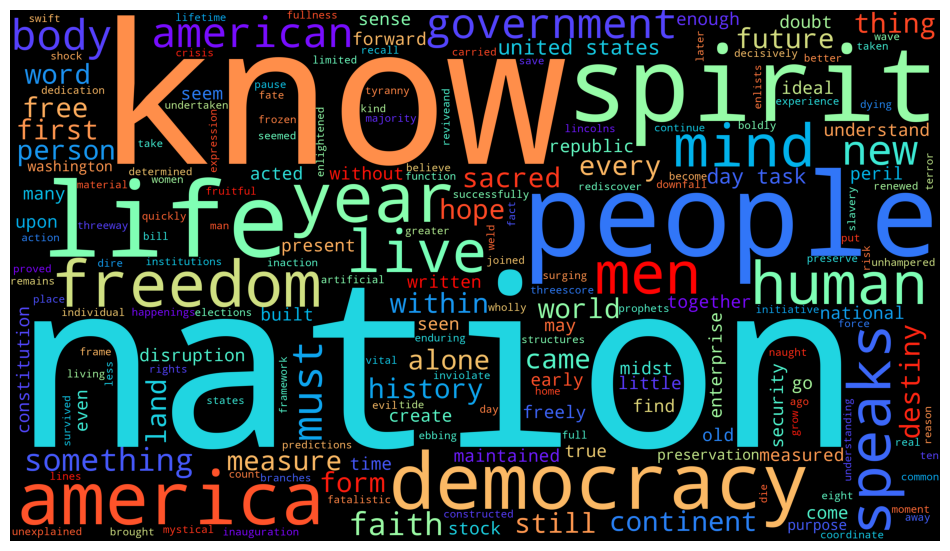

In [216]:
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'rainbow',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()